# Ch9 Plotting and Visualization

Over time, `matplotlib` has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is `seaborn`.

In [38]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [1]:
%matplotlib notebook

## 9.1 A Brief matplotlib API Primer

In [39]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


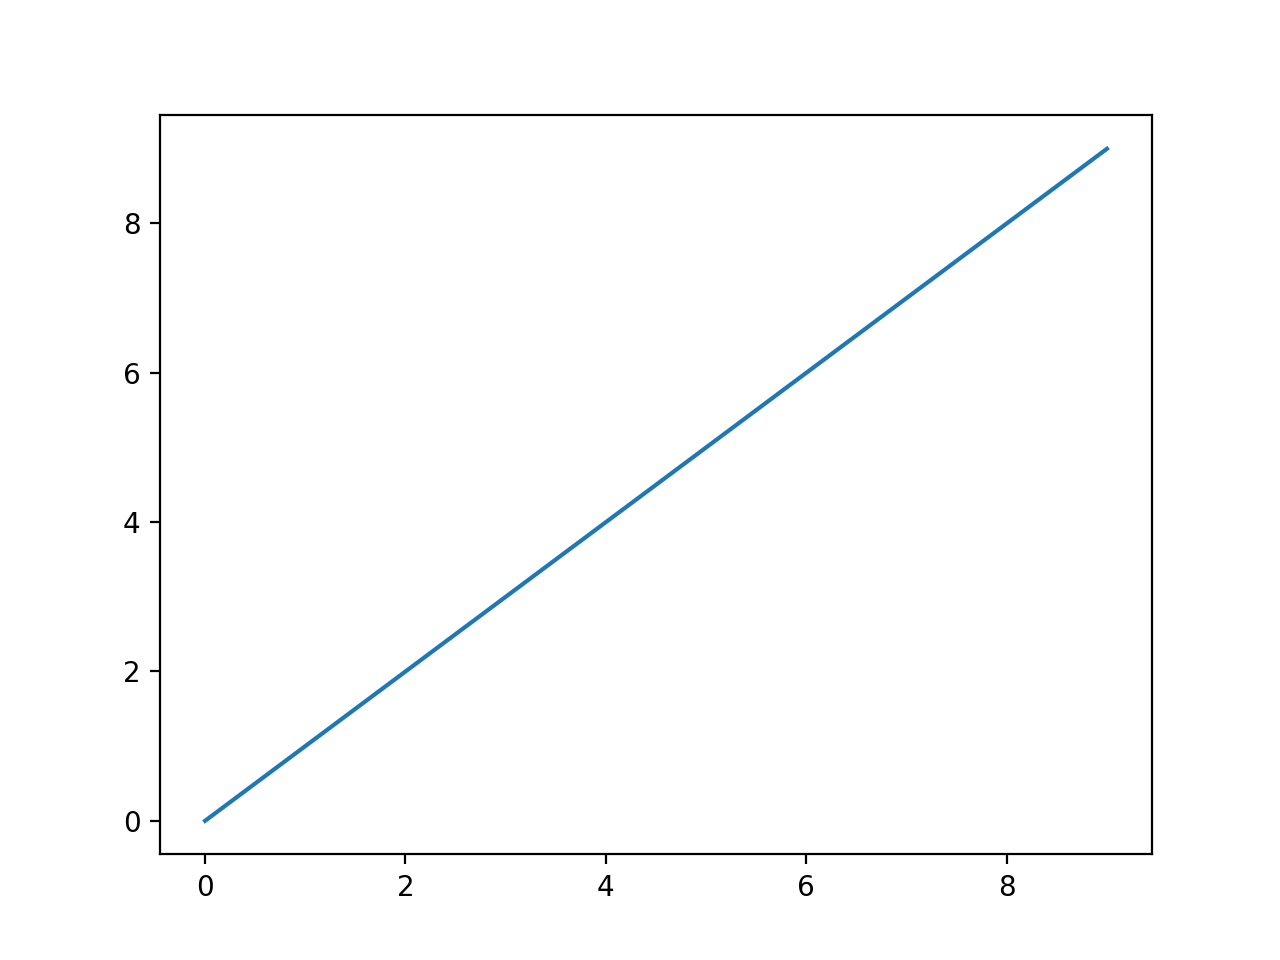

In [4]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

### Figures and Subplots

Plots in `matplotlib` reside within a `Figure` object.

<IPython.core.display.Javascript object>


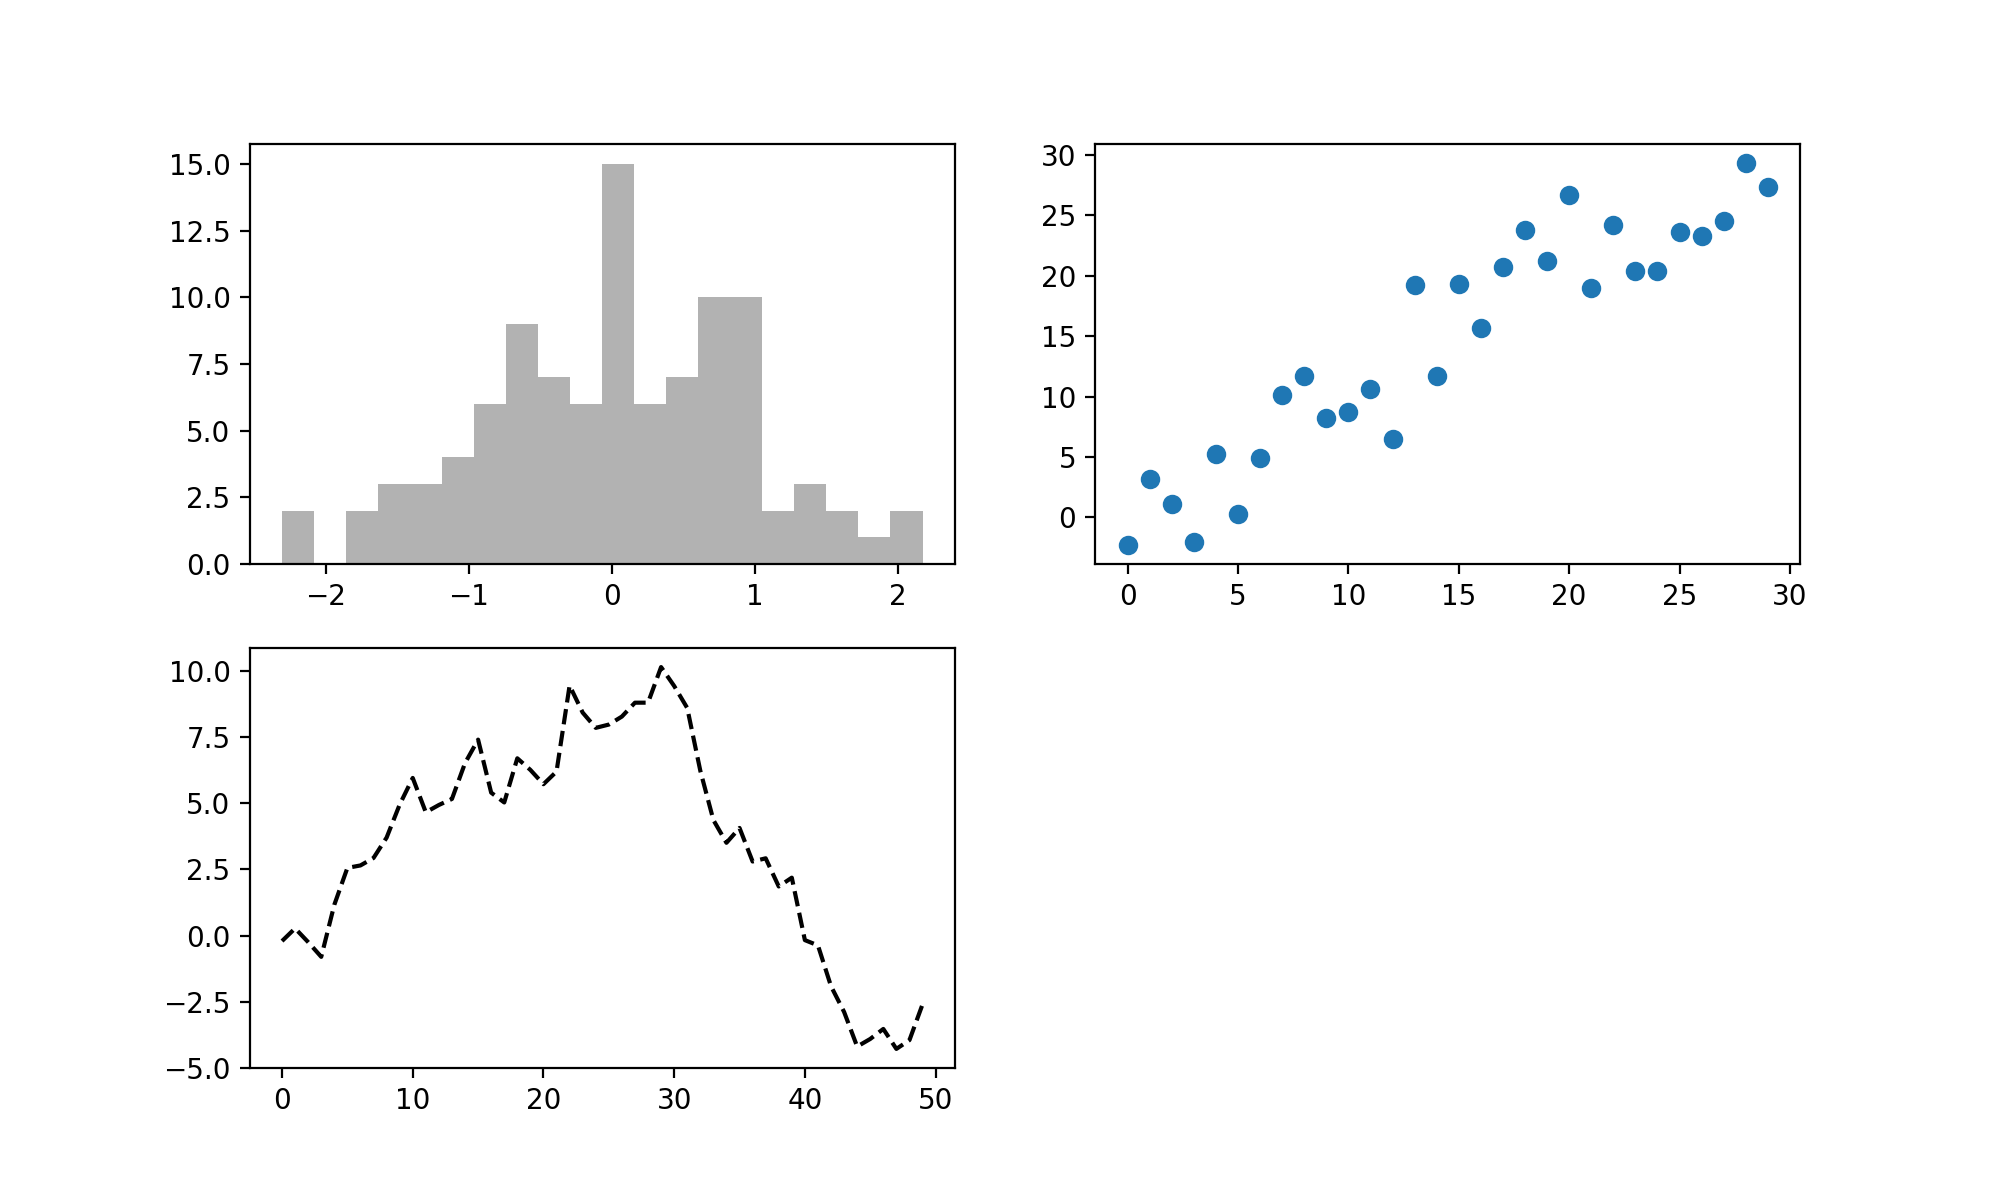

In [6]:
fig = plt.figure()

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1)

In [8]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--') # black dashed line

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [11]:
plt.close('all')

<IPython.core.display.Javascript object>


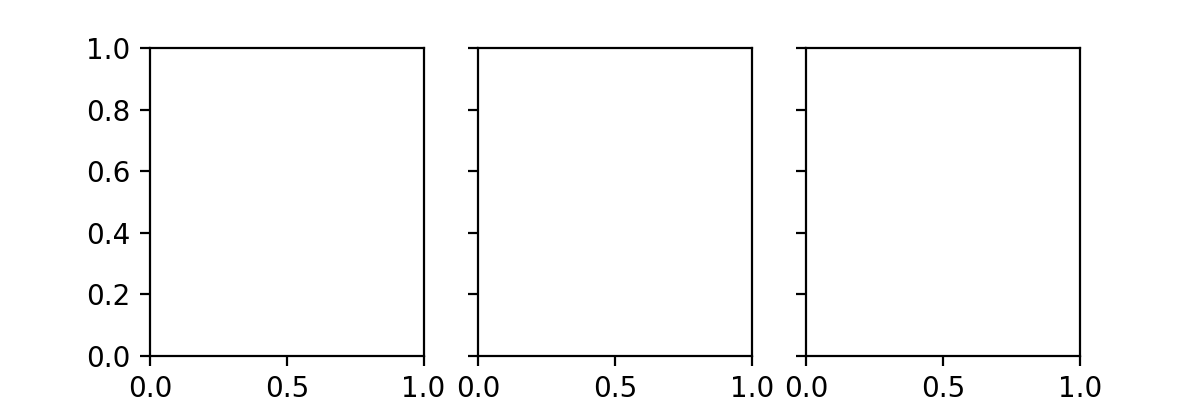

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001961EC9C198>,
      dtype=object)

In [22]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(6, 2)) # 2 rows and 3 columns
axes

#### Adjusting the spacing around subplots

`wspace` and `hspace` controls the percent of the figure width and figure height, respectively, to use as spacing between subplots

```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

<IPython.core.display.Javascript object>


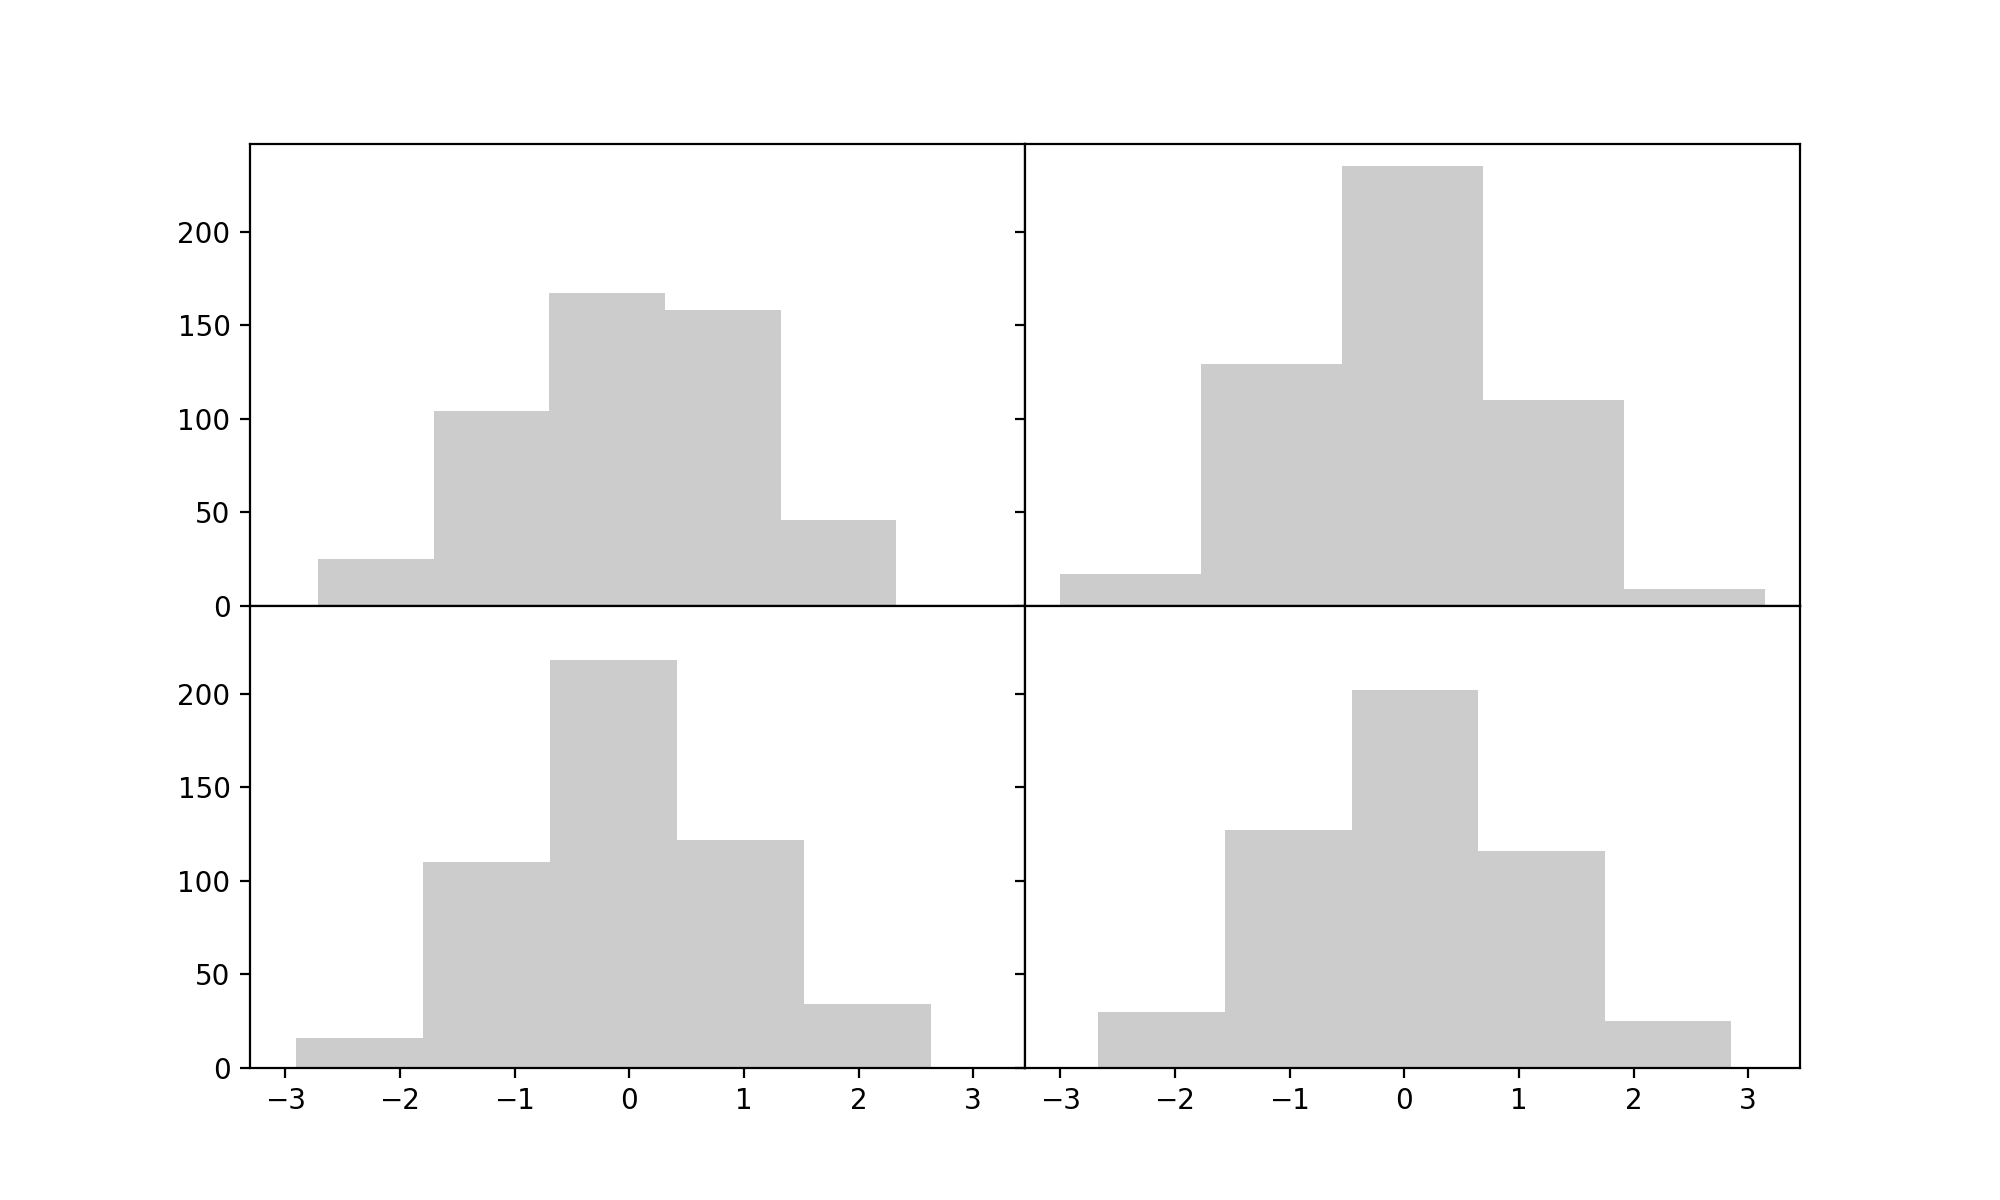

In [29]:
# shrink the spacing all the way to zero
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=5, color='k', alpha=0.2) #alpha here control the degree of color
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

Matplotlib’s main `plot` function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. For example, to plot x versus y with green dashes, you would execute:

```python
ax.plot(x, y, 'g--')
```

The same plot could also have been expressed more explicitly as:

```python
ax.plot(x, y, linestyle='--', color='g')
```

More colors:

In [33]:
plot?

Object `plot` not found.


<IPython.core.display.Javascript object>


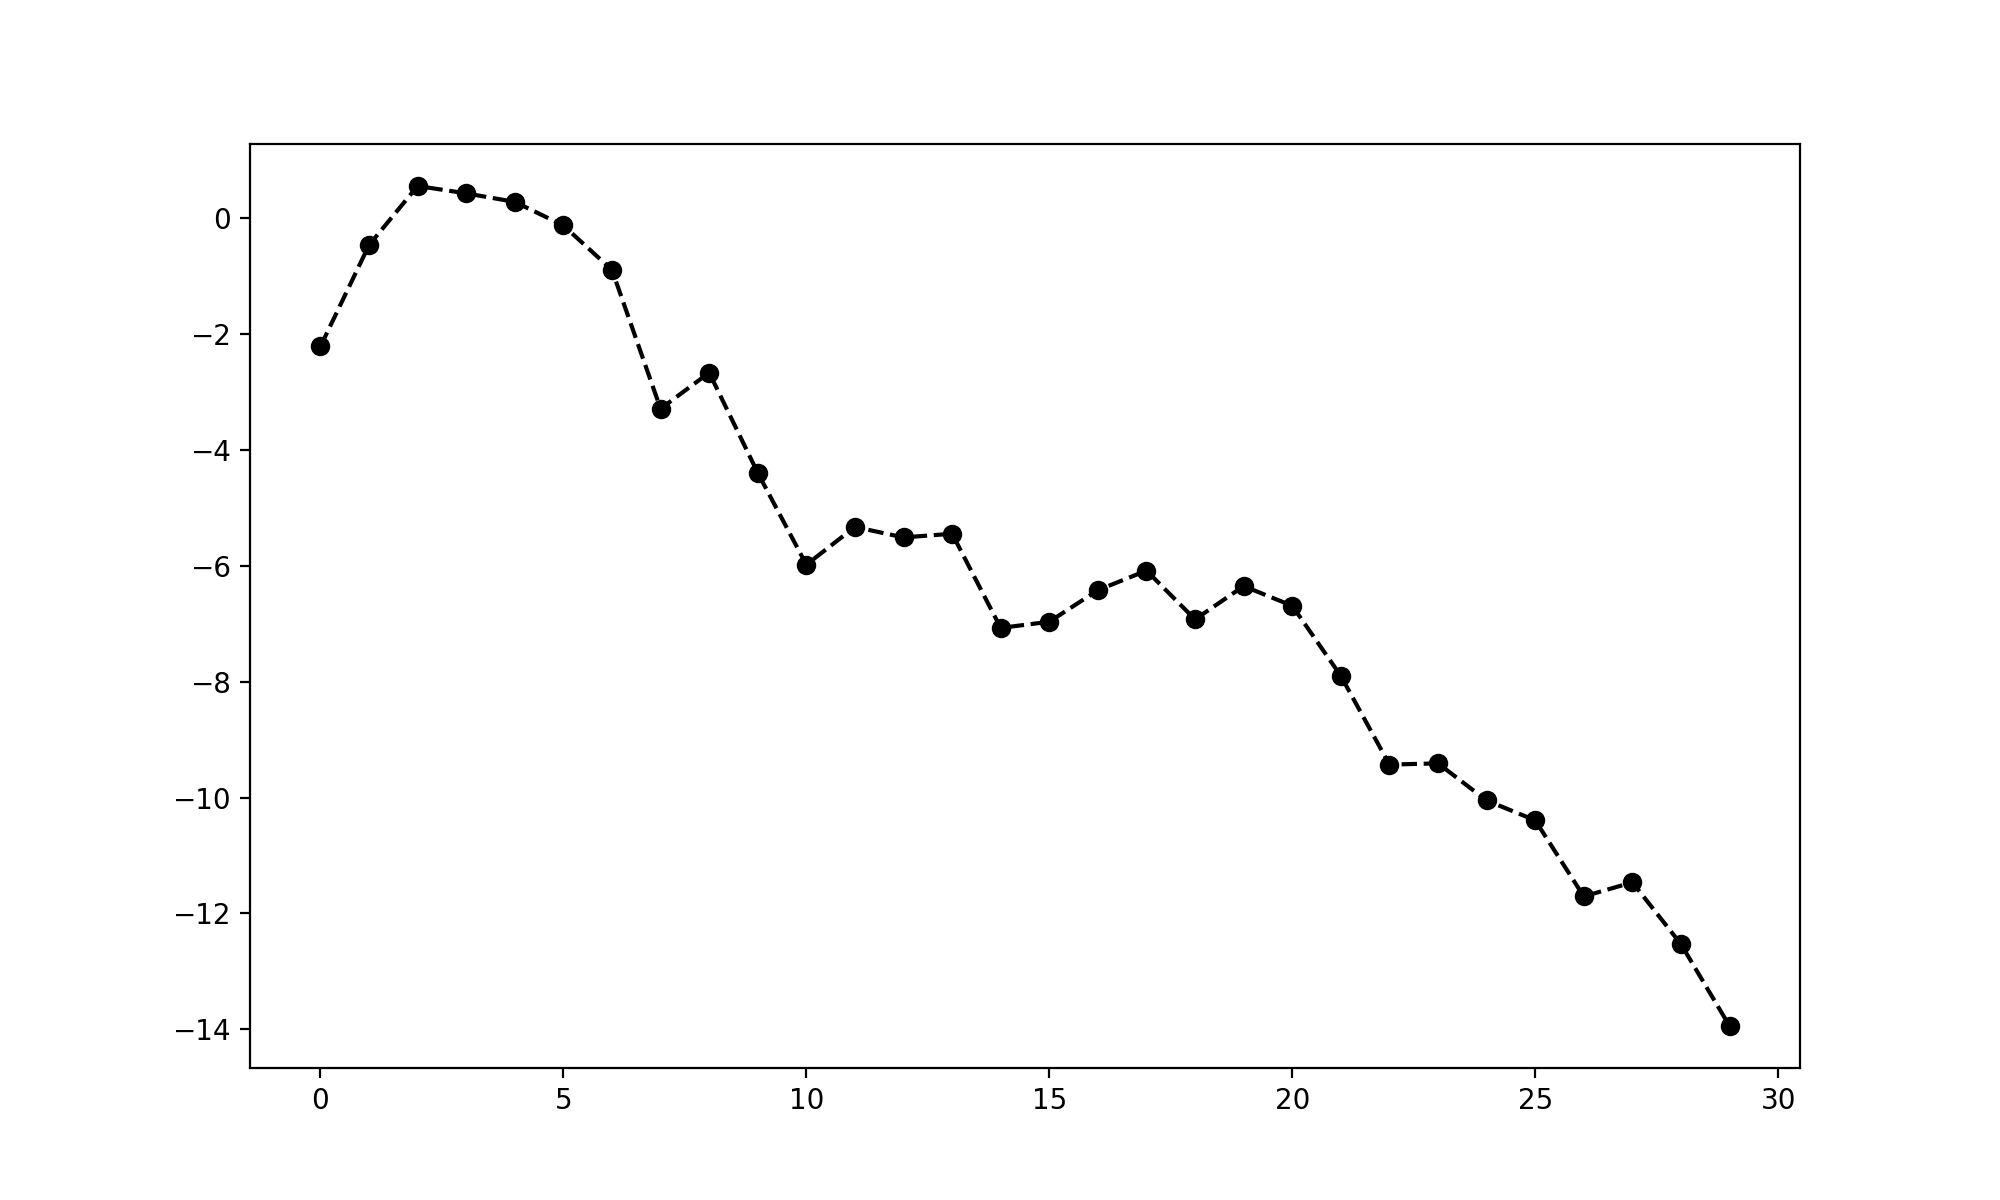

<IPython.core.display.Javascript object>


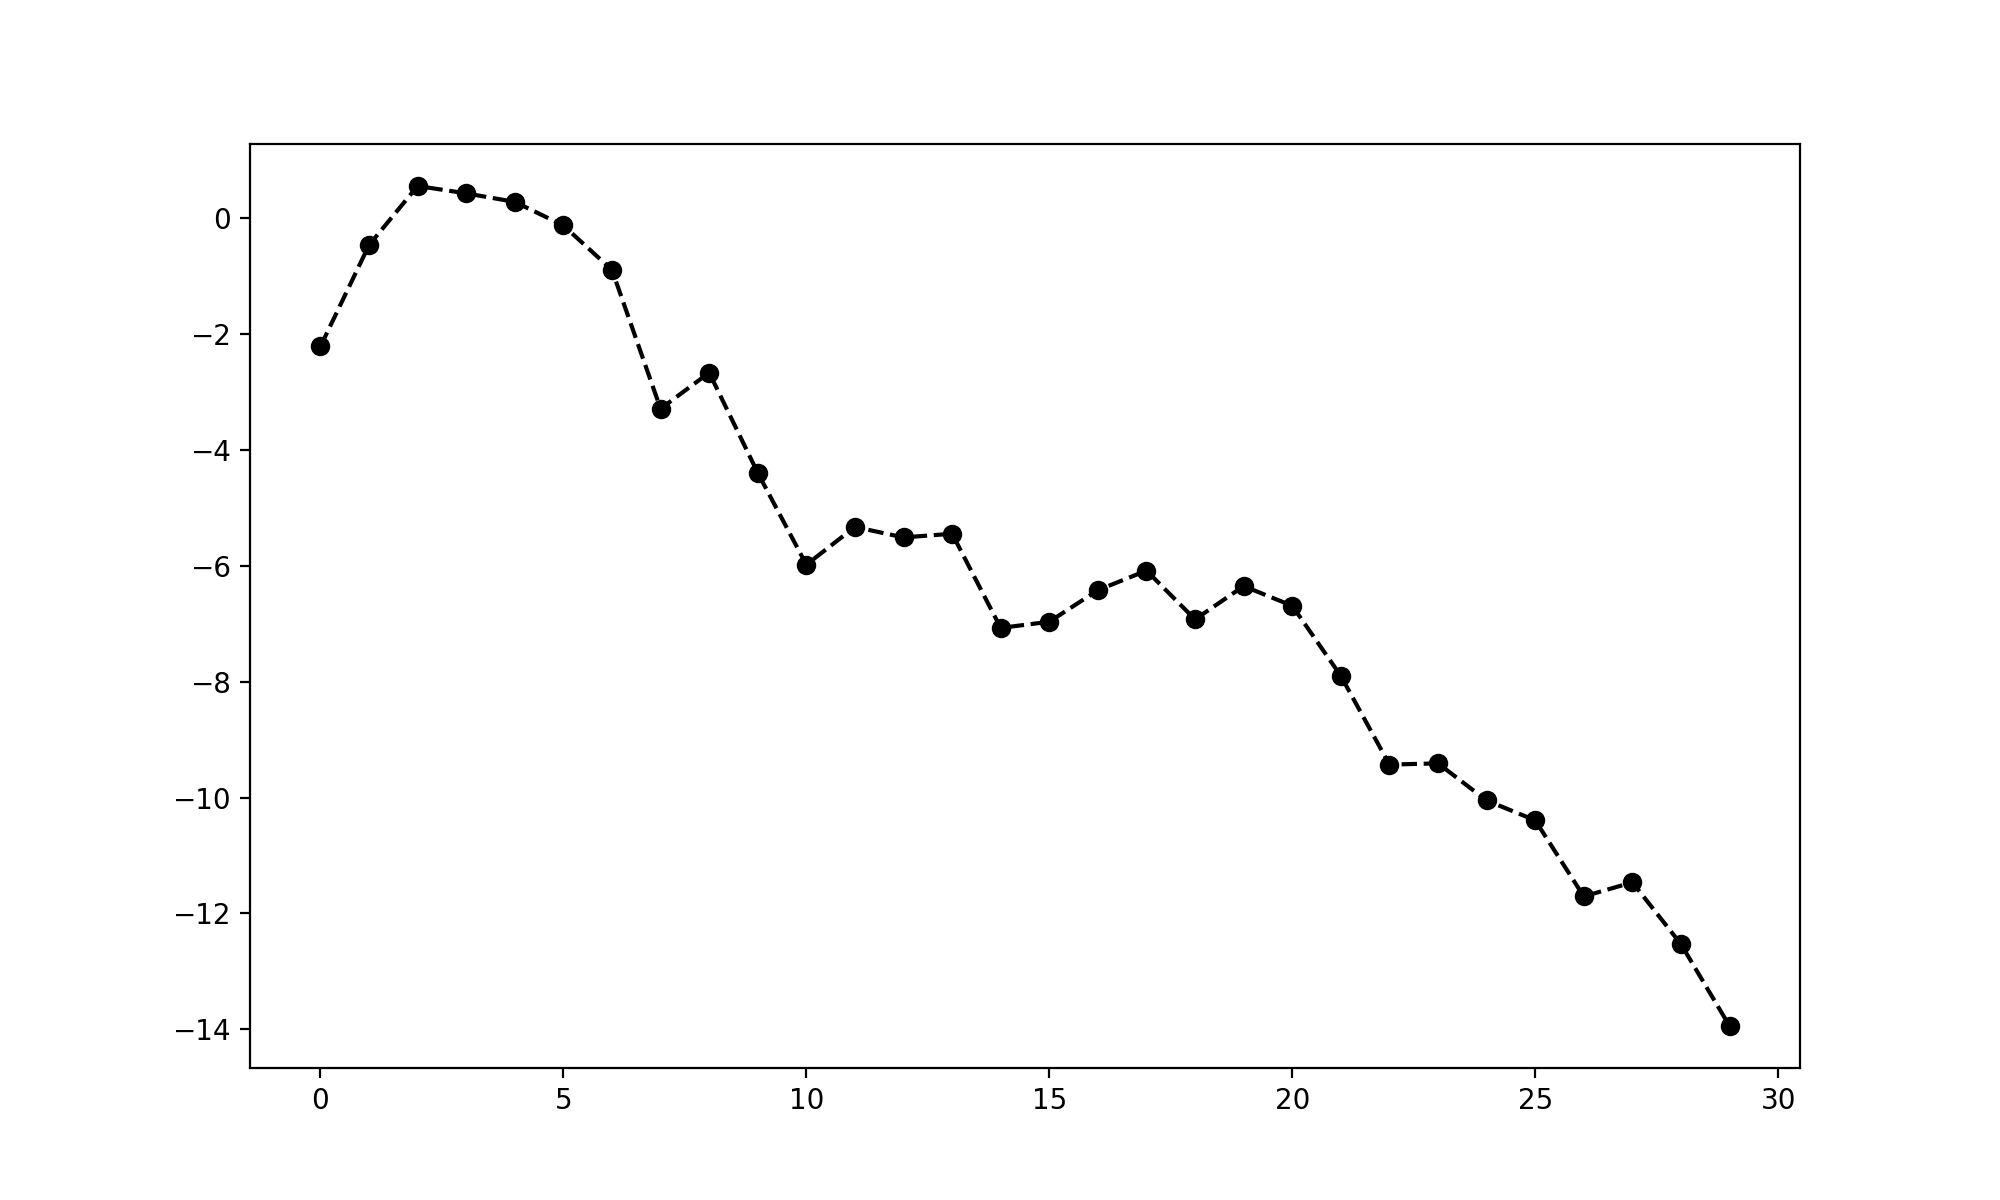

In [34]:
plt.figure()

In [35]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitly as:

```python
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

In [36]:
plt.close('all')

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the `drawstyle` option

<IPython.core.display.Javascript object>


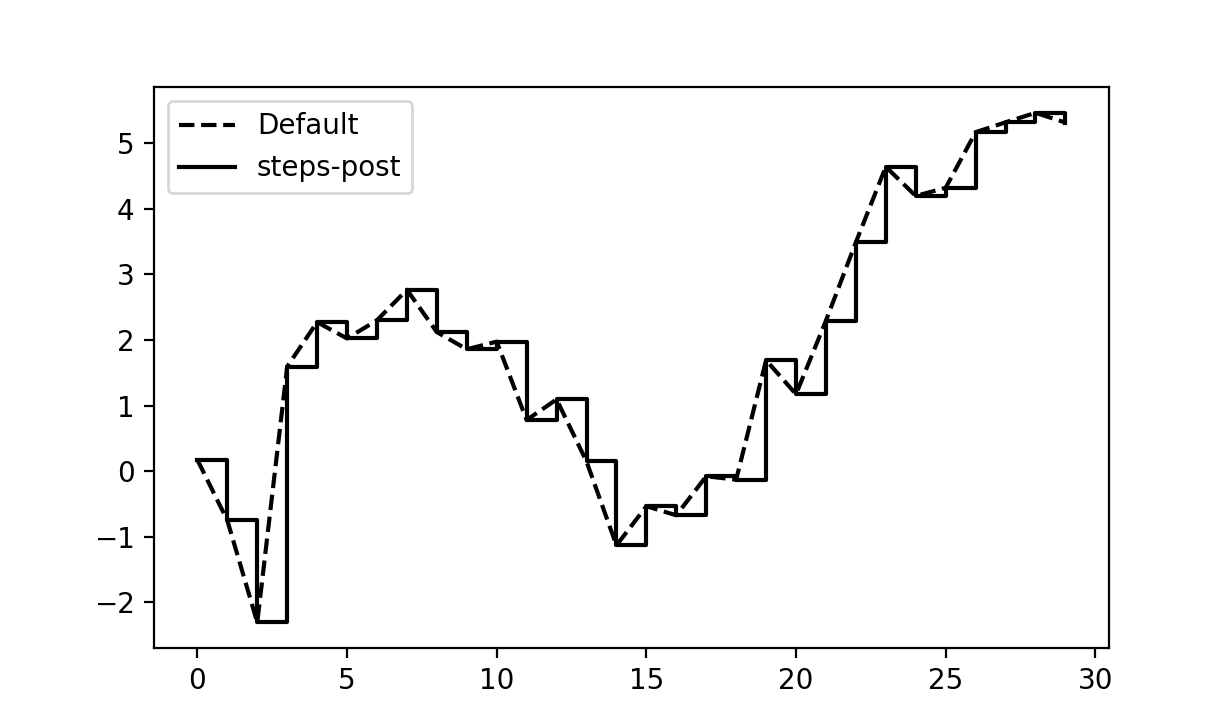

In [37]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


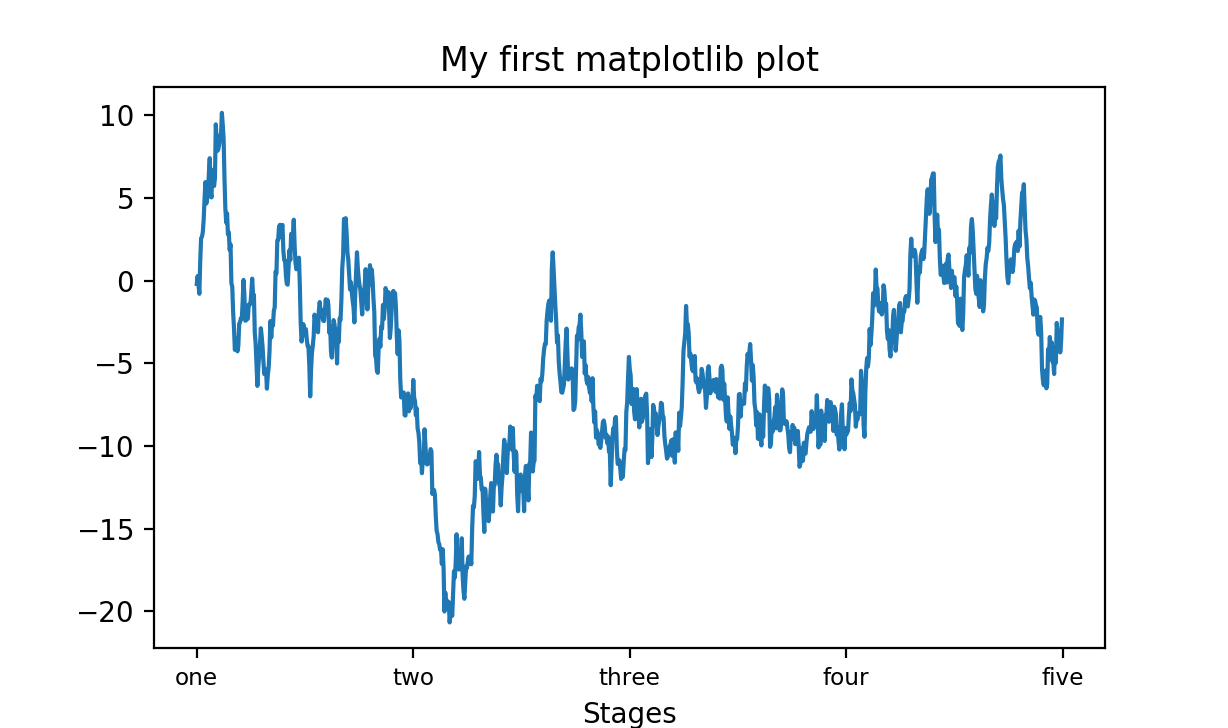

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use `set_xticks` and `set_xticklabels`. The former instructs matplotlib where to place the ticks along the data range; **by default these locations will also be the labels**. But we can set any other values as the labels using `set_xticklabels`:

In [42]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=0, fontsize='small')

In [43]:
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,26.5244,'Stages')

The axes class has a `set` method that allows batch setting of plot properties. From the prior example, we could also have written:

```python
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)
```

#### Adding legends

<IPython.core.display.Javascript object>


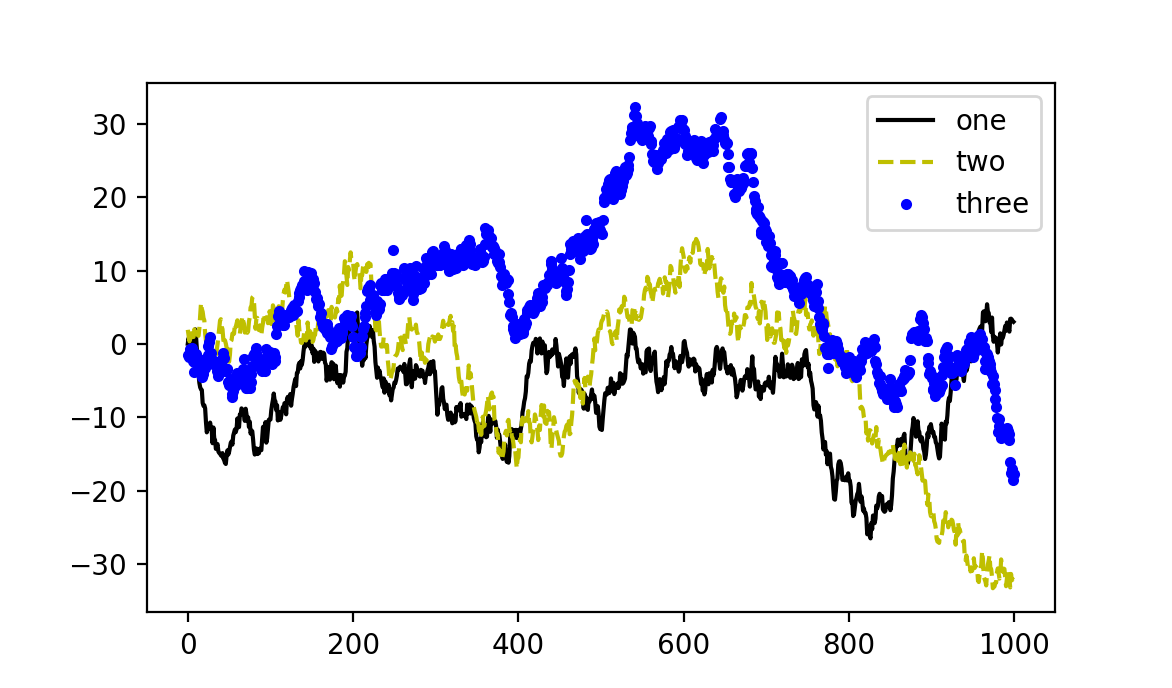

In [49]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'y--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')

call `ax.legend()` or `plt.legend()` to automatically create a legend

In [50]:
ax.legend(loc='best')

To exclude one or more elements from the legend, pass no label or `label='_nolegend_'`.

### Annotations and Drawing on a Subplot

```python
ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)
```

<IPython.core.display.Javascript object>


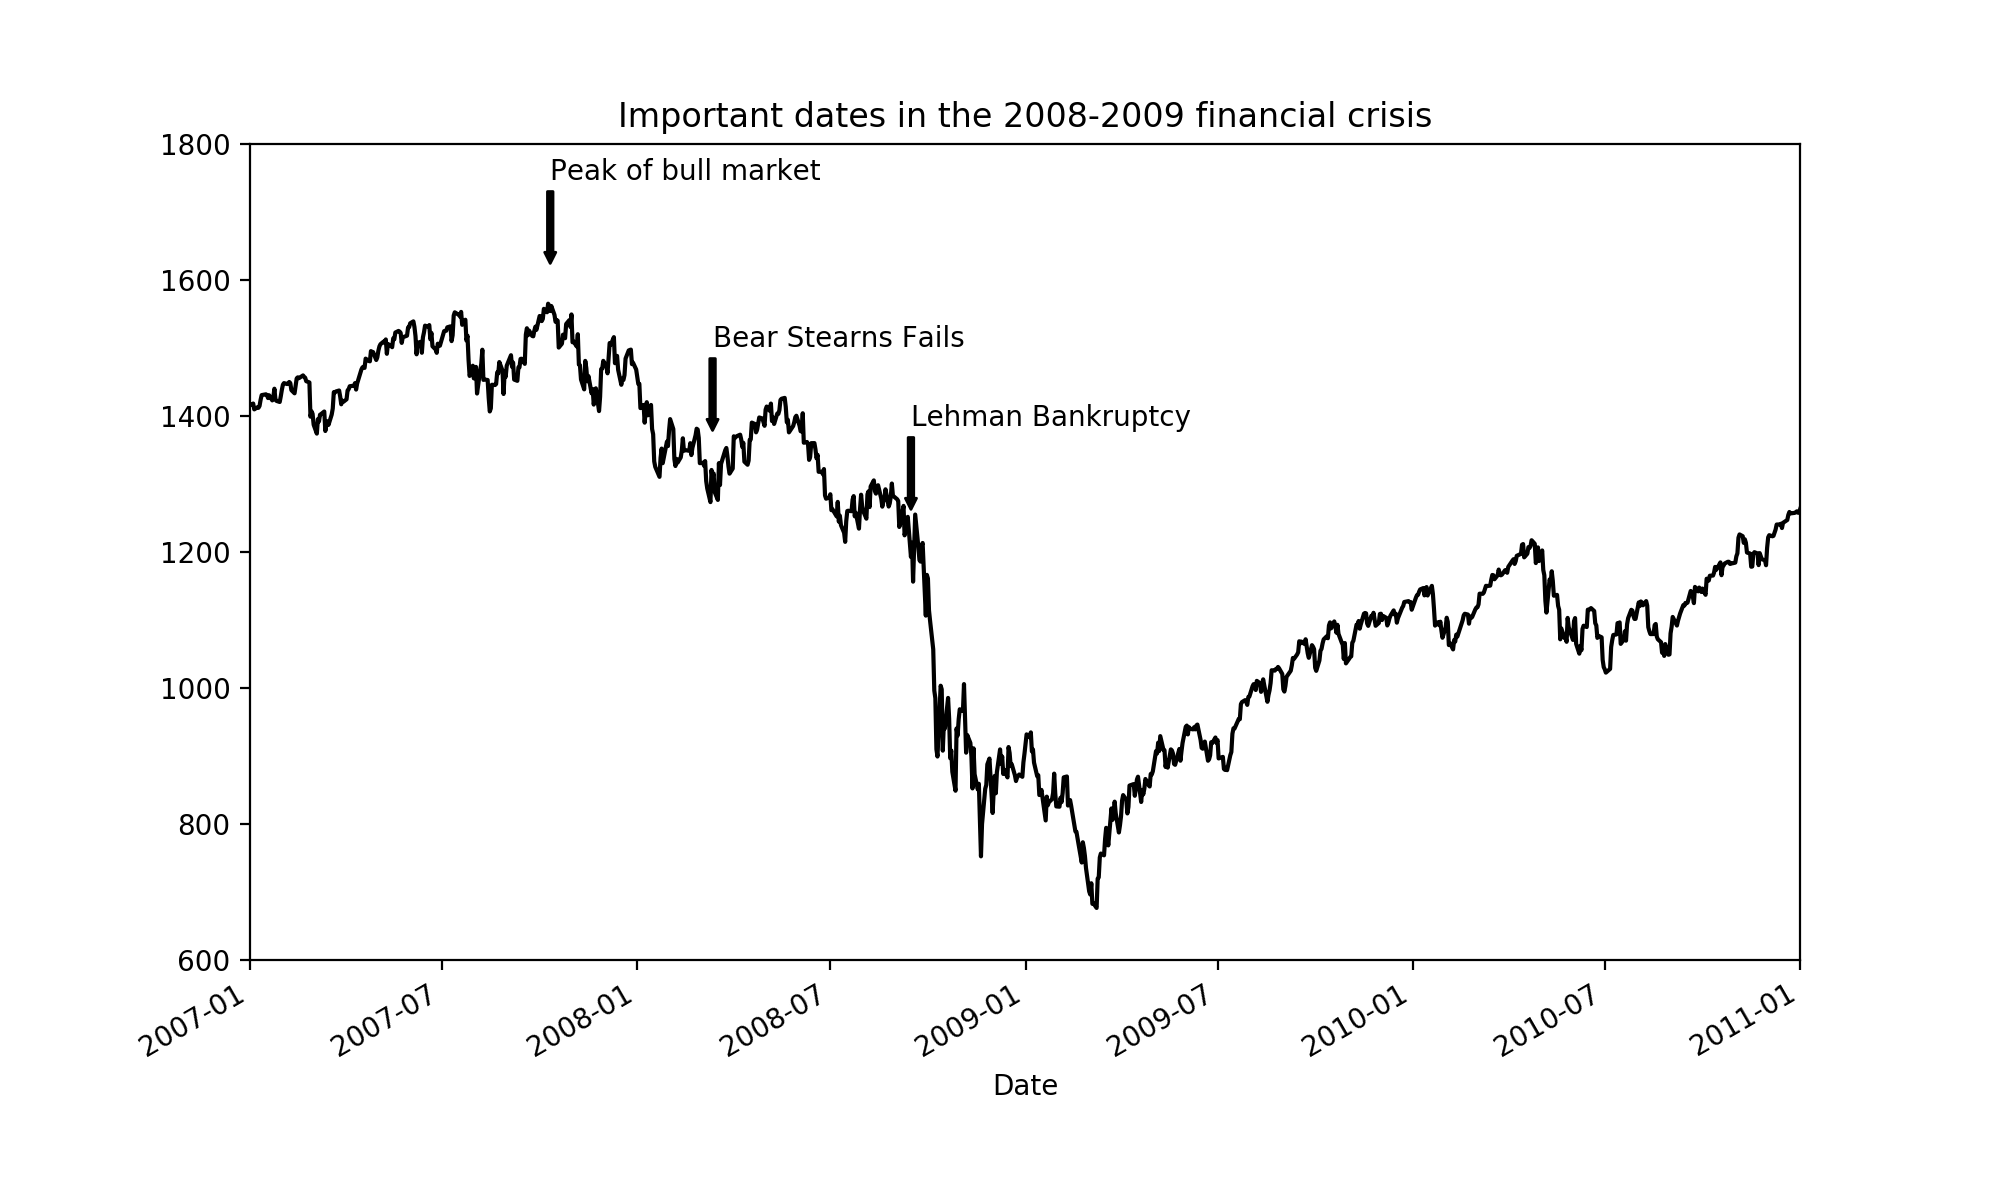

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

In [56]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 70),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [ ]:
ax.set_title('Important dates in the 2008–2009 financial crisis')

shapes -- patches

To add a shape to a plot, you create the patch object `shp` and add it to a subplot by calling `ax.add_patch(shp)`

<IPython.core.display.Javascript object>


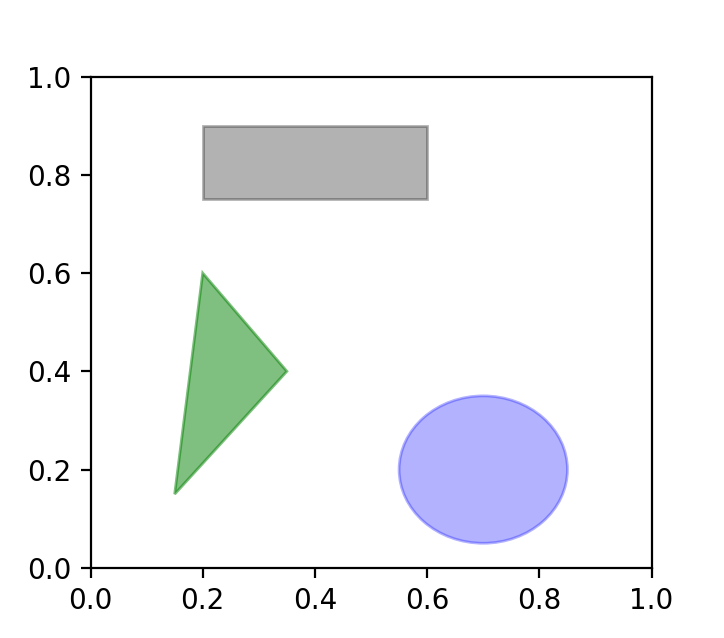

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

to save an SVG version of a figure, you need only type:

```python
plt.savefig('figpath.svg')
plt.savefig('figpath.pdf')
plt.savefig('figpath.png')
```

`dpi`, which controls the dots-per-inch resolution

`bbox_inches`, which can trim the whitespace around the actual figure

```python
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

`savefi`g doesn’t have to write to disk; it can also write to any file-like object, such as a `BytesIO`:

```python
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
```

### matplotlib Configuration

One way to modify the configuration programmatically from Python is to use the `rc` method; 

For example, to set the global default figure size to be 10 × 10, you could enter:

```python
plt.rc('figure', figsize=(10, 10))
```

An easy way to write down the options in your program is as a dict:

```python
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)
```

## 9.2 Plotting with pandas and seaborn

matplotlib can be a fairly low-level tool. 

Another library is `seaborn`, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization types.

Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics. Even if you do not use the seaborn API, you may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots.

### Line Plots

In [58]:
plt.close('all')

Series and DataFrame each have a plot attribute for making some basic plot types. By default, `plot()` makes line plots 

<IPython.core.display.Javascript object>


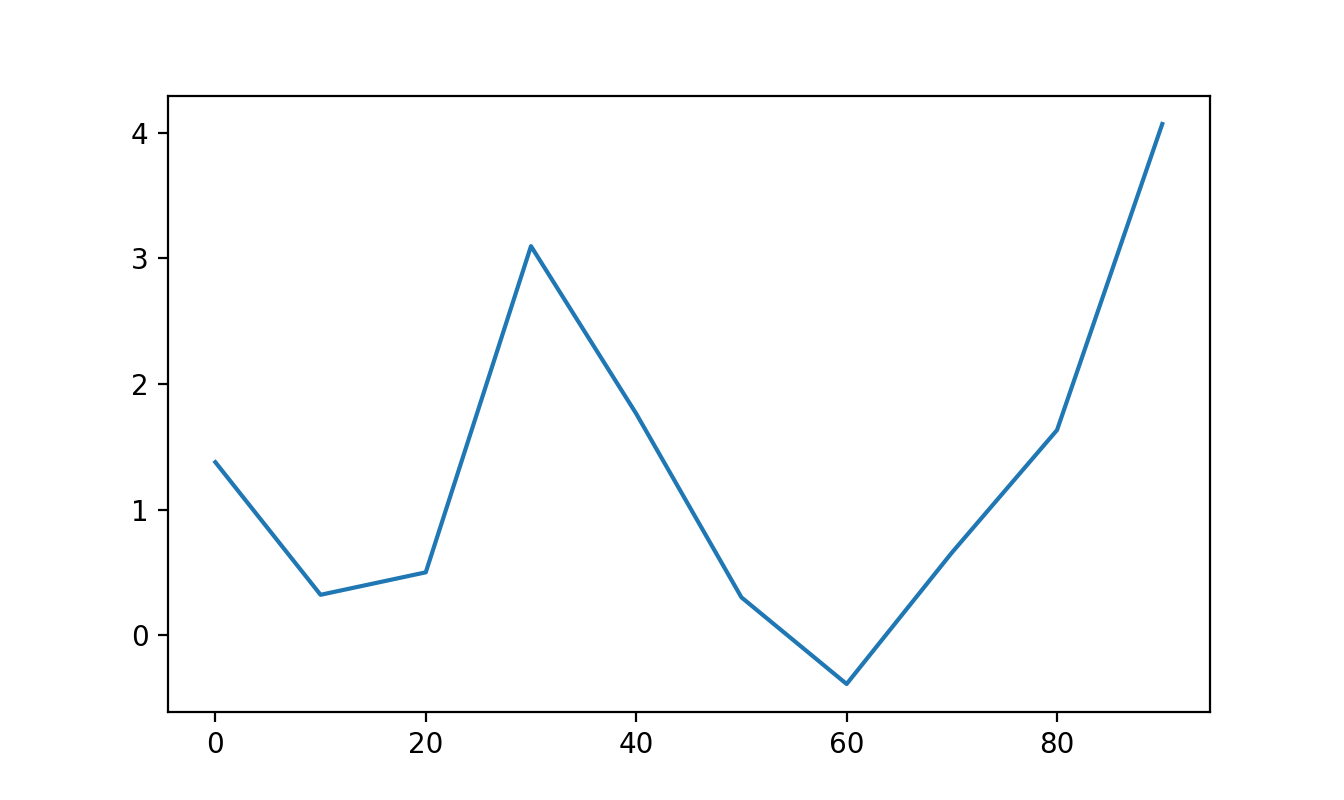

In [59]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically:

<IPython.core.display.Javascript object>


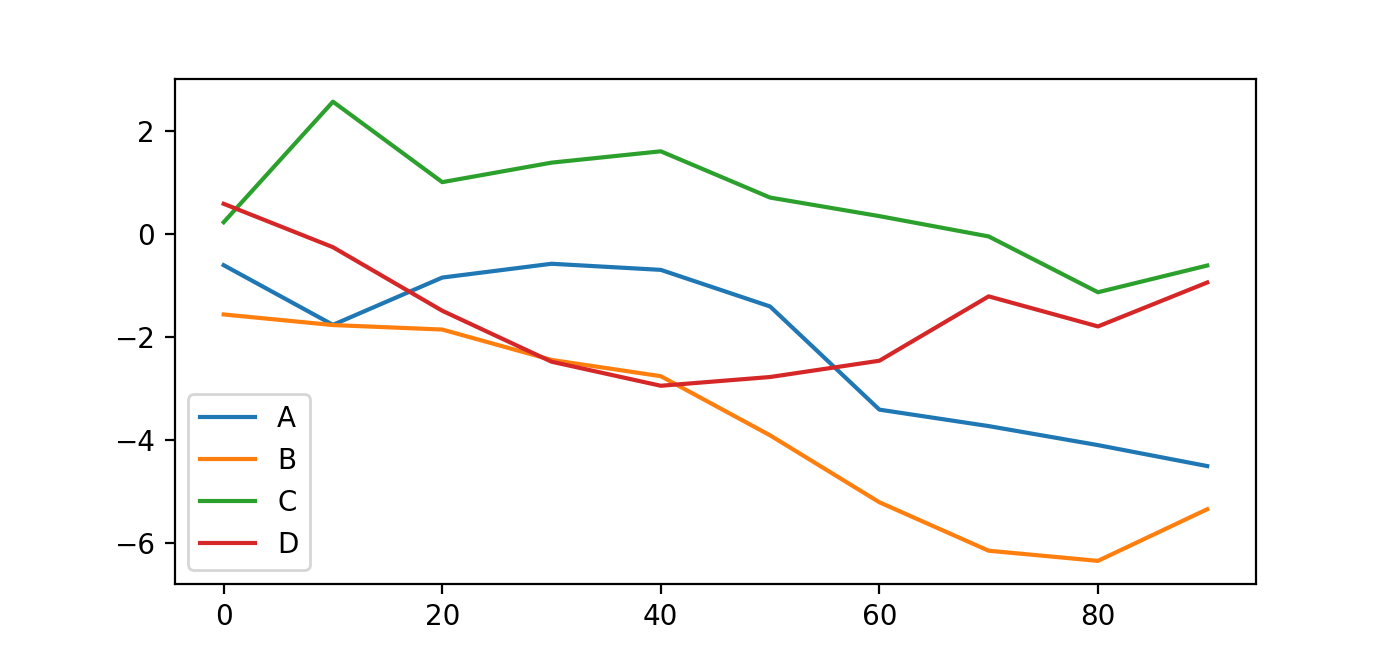

In [60]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

**The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots**, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks

<IPython.core.display.Javascript object>


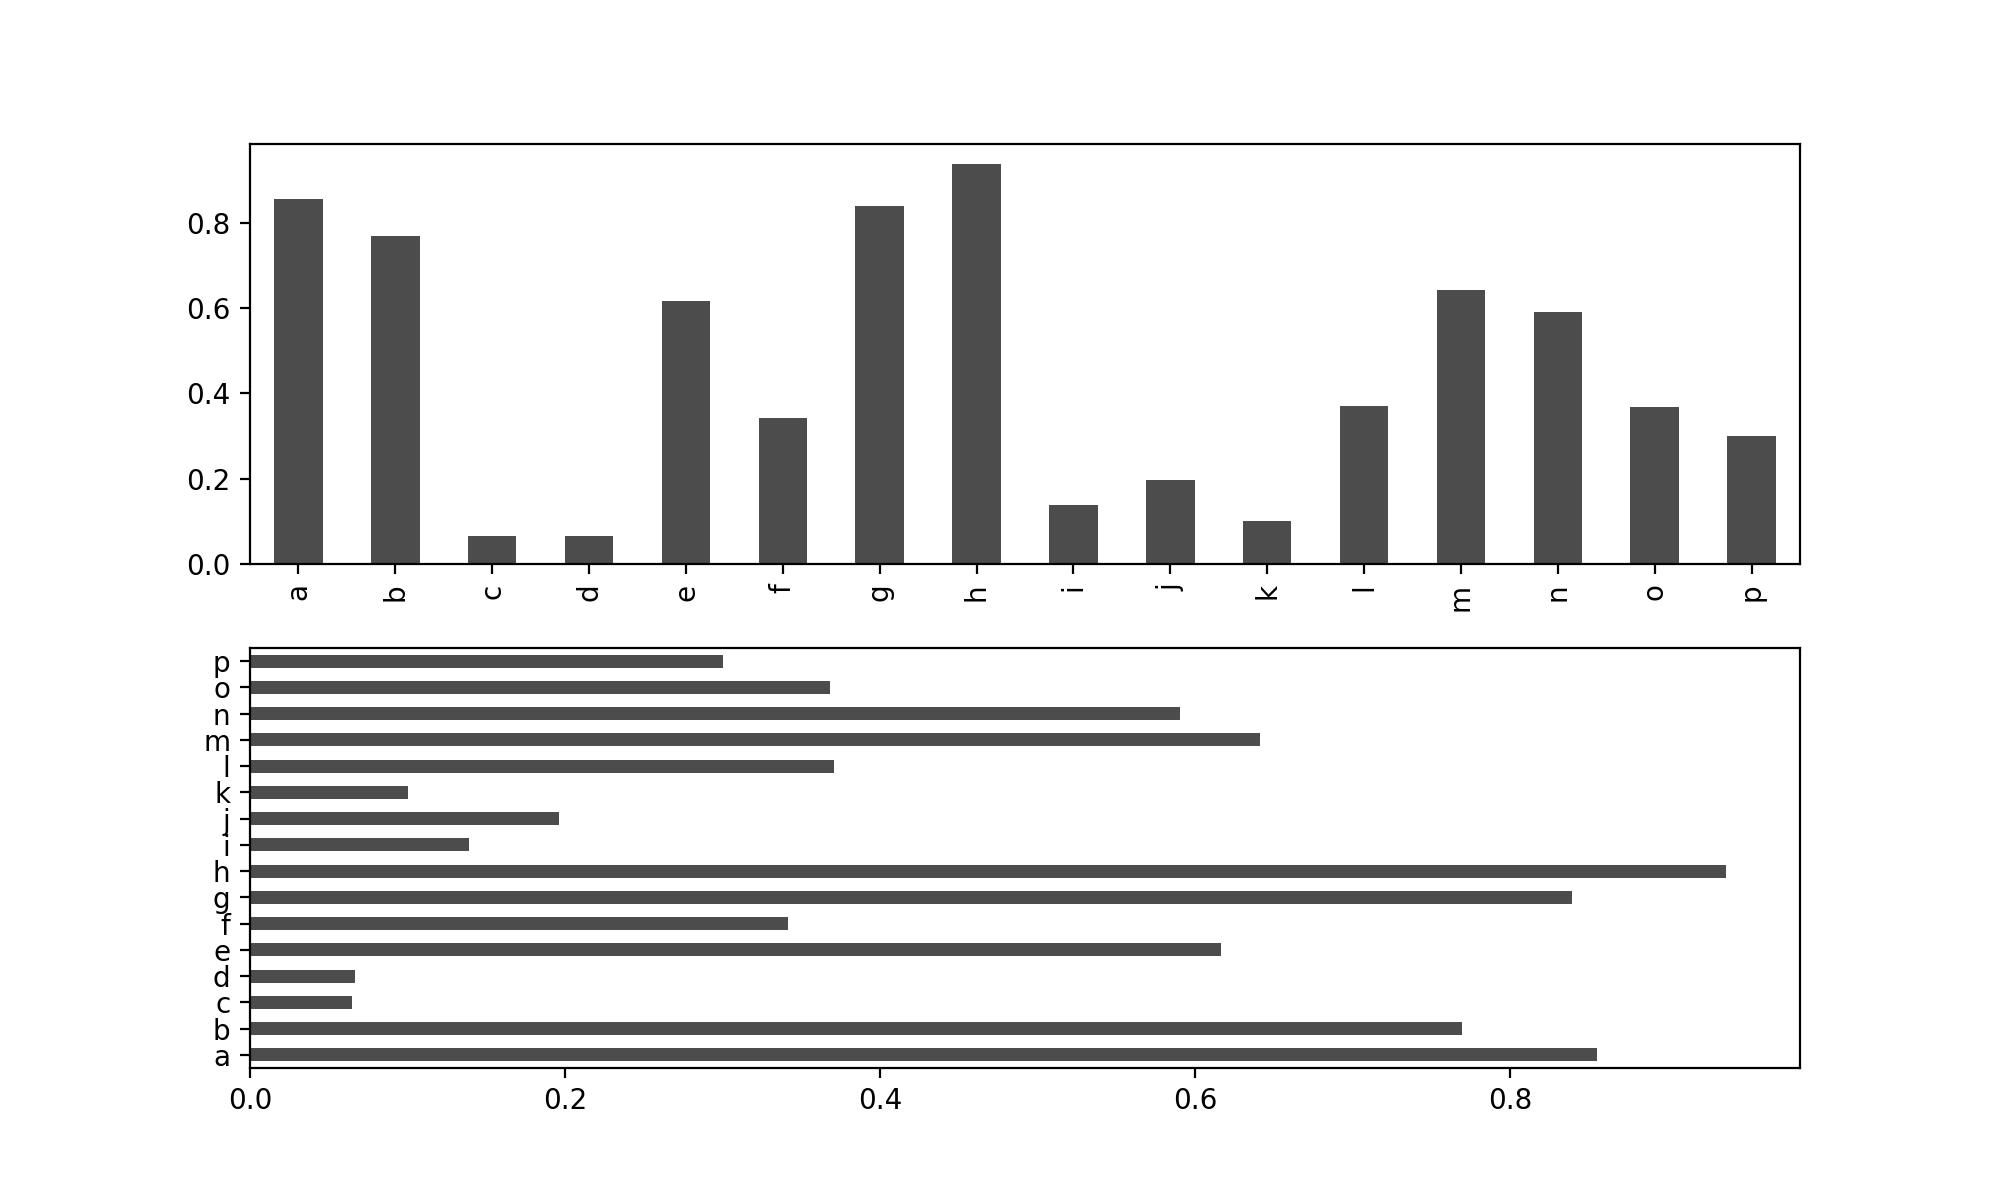

In [61]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [ ]:
np.random.seed(12348)

<IPython.core.display.Javascript object>


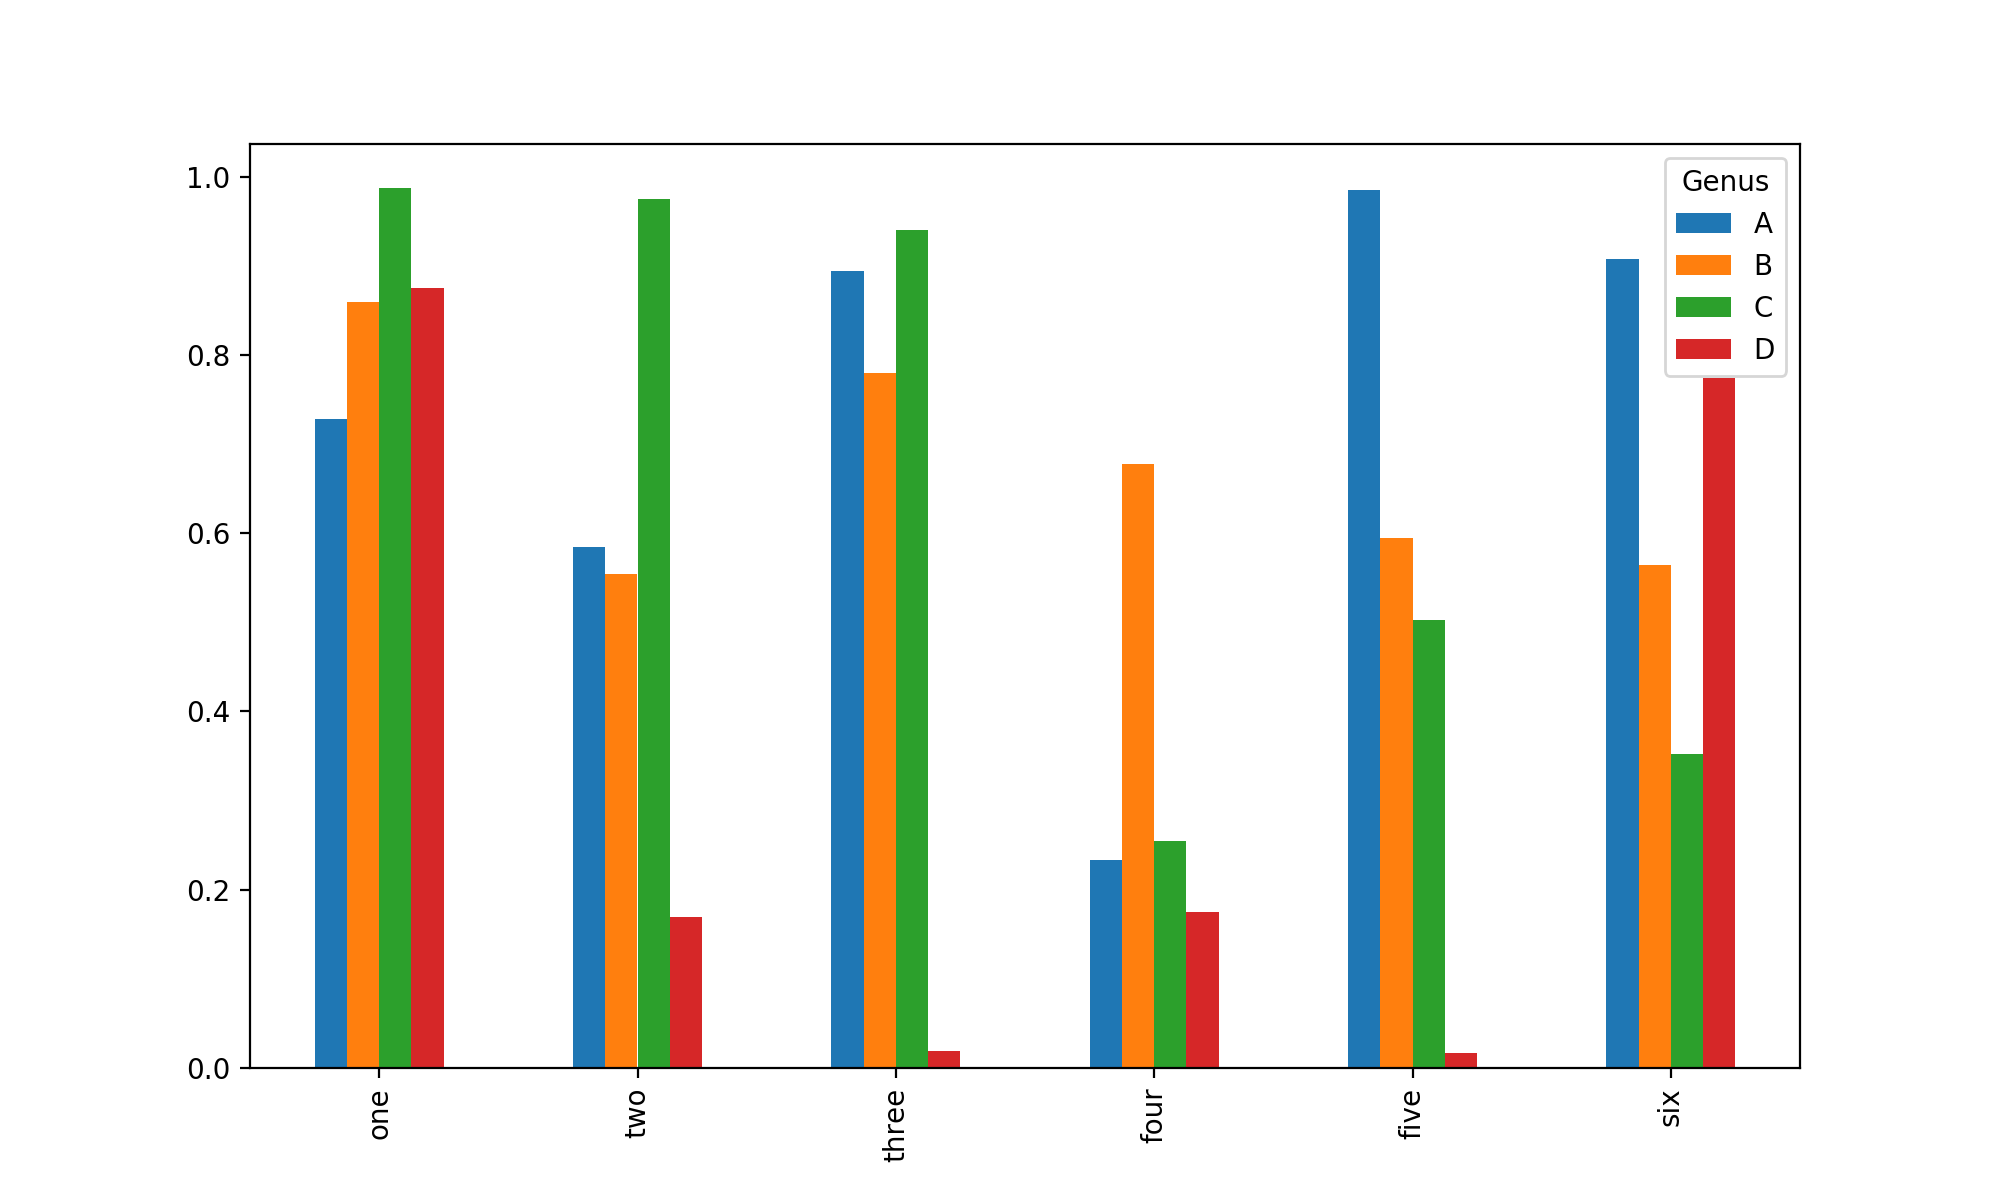

In [62]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

We create stacked bar plots from a DataFrame by passing `stacked=True`, resulting in the value in each row being stacked together

<IPython.core.display.Javascript object>


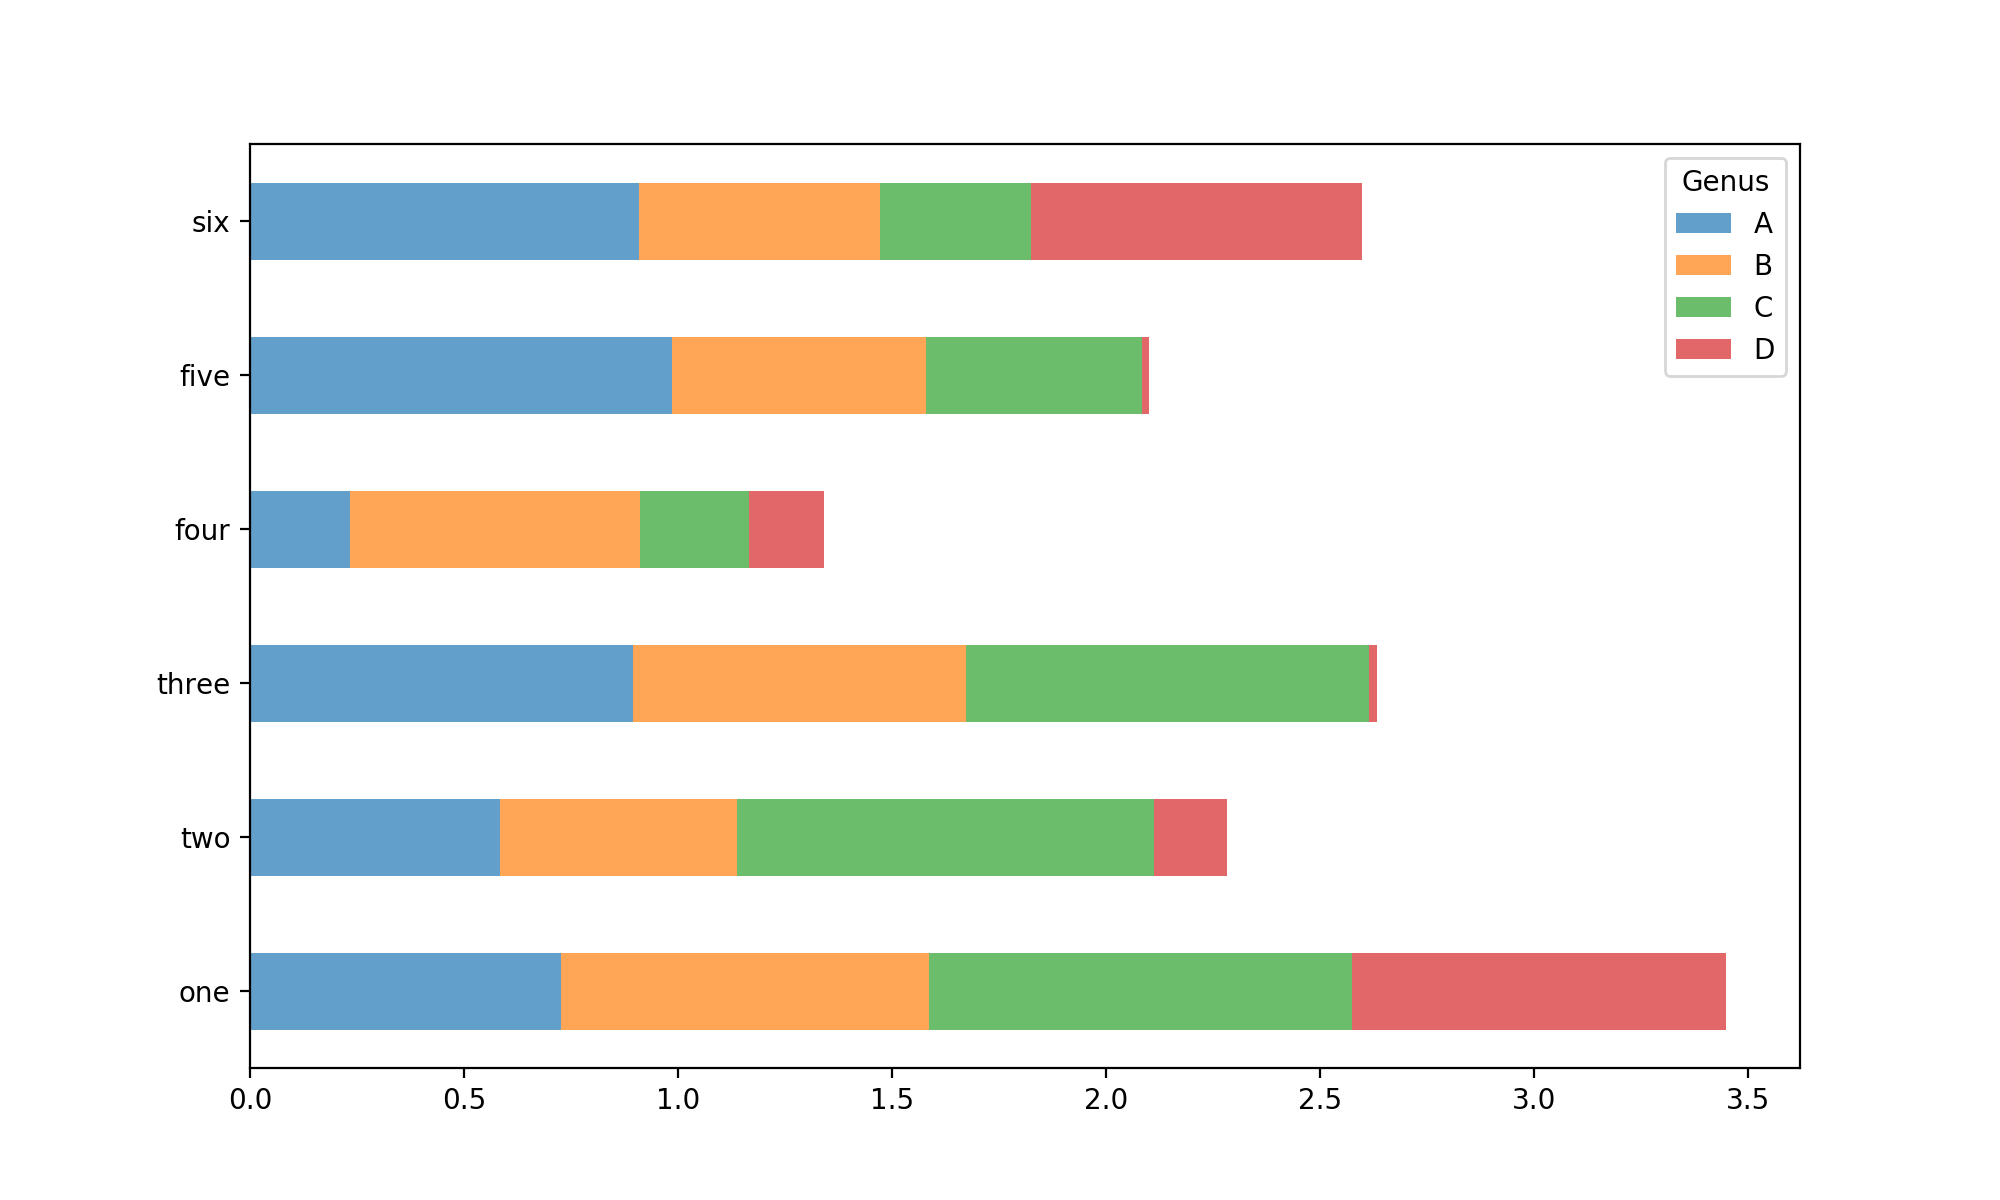

In [65]:
df.plot.barh(stacked=True, alpha=0.7)

In [66]:
plt.close('all')

In [67]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

normalize so that each row sums to 1:

<IPython.core.display.Javascript object>


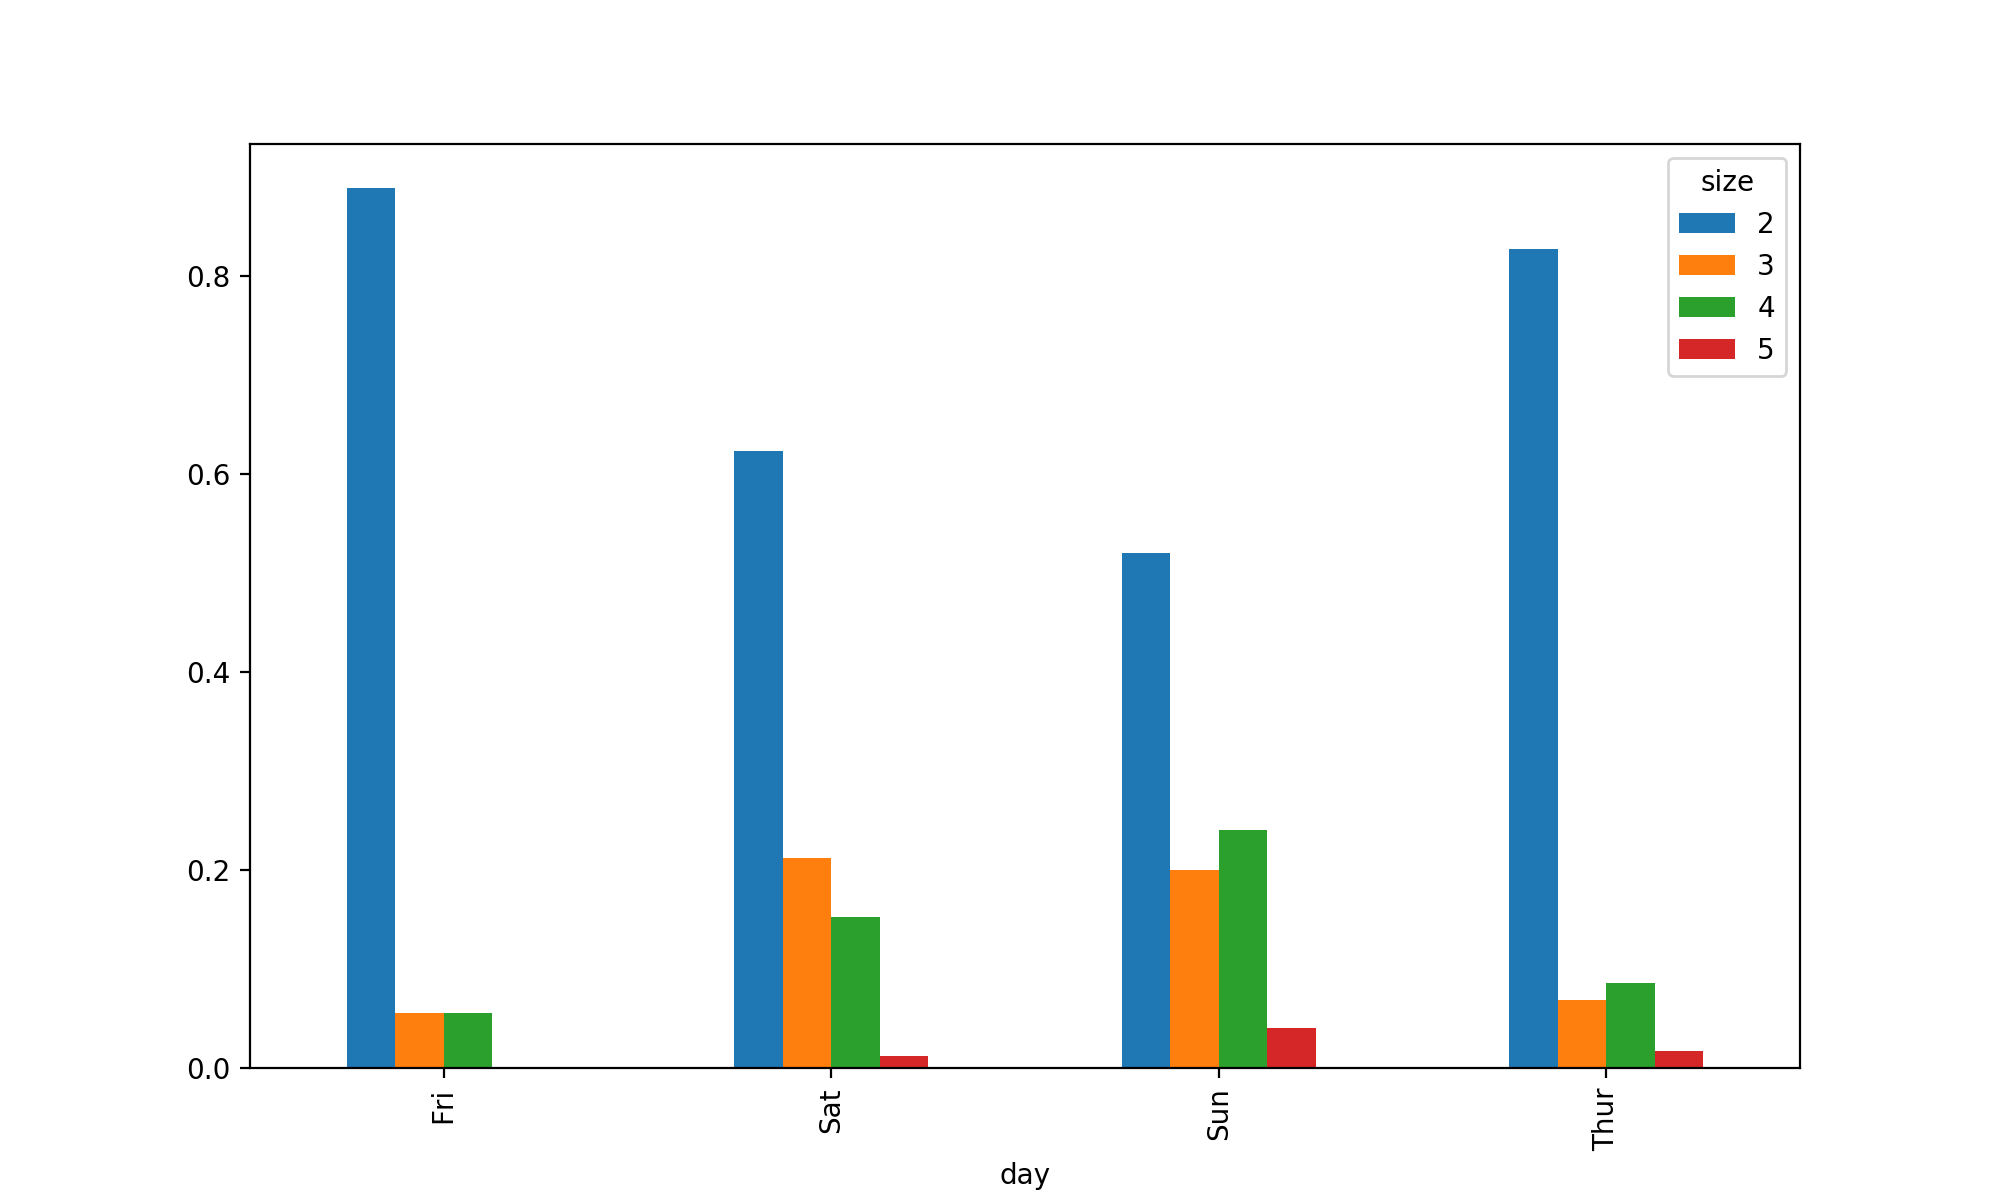

In [68]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [69]:
plt.close('all')

**With data that requires aggregation or summarization before making a plot, using the seaborn package can make things much simpler**. Let’s look now at the tipping percentage by day with seaborn

C:\Users\surface\ananew\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


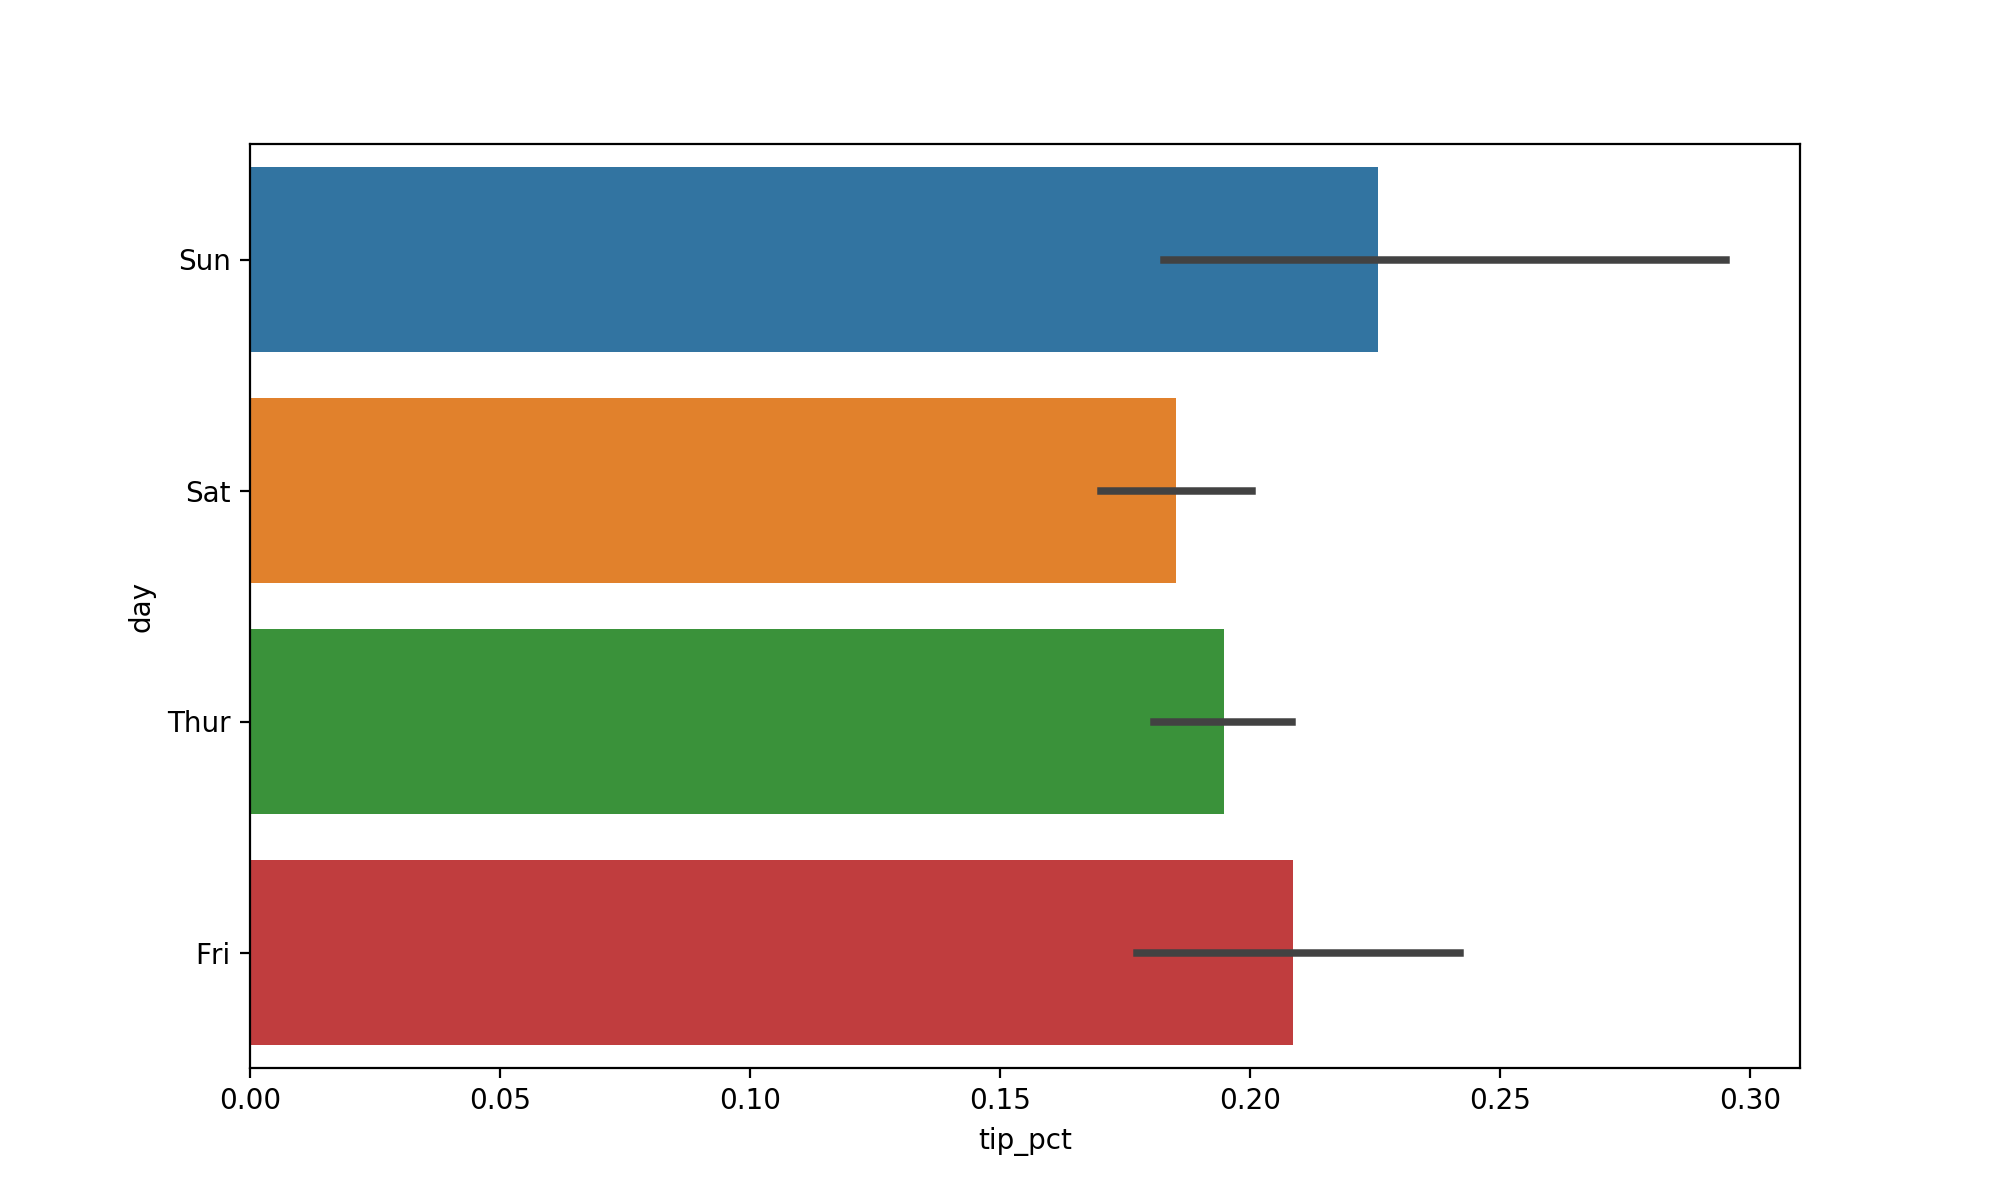

In [70]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [71]:
plt.close('all')

`seaborn.barplot` has a **`hue` option that enables us to split by an additional categorical value**:

C:\Users\surface\ananew\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


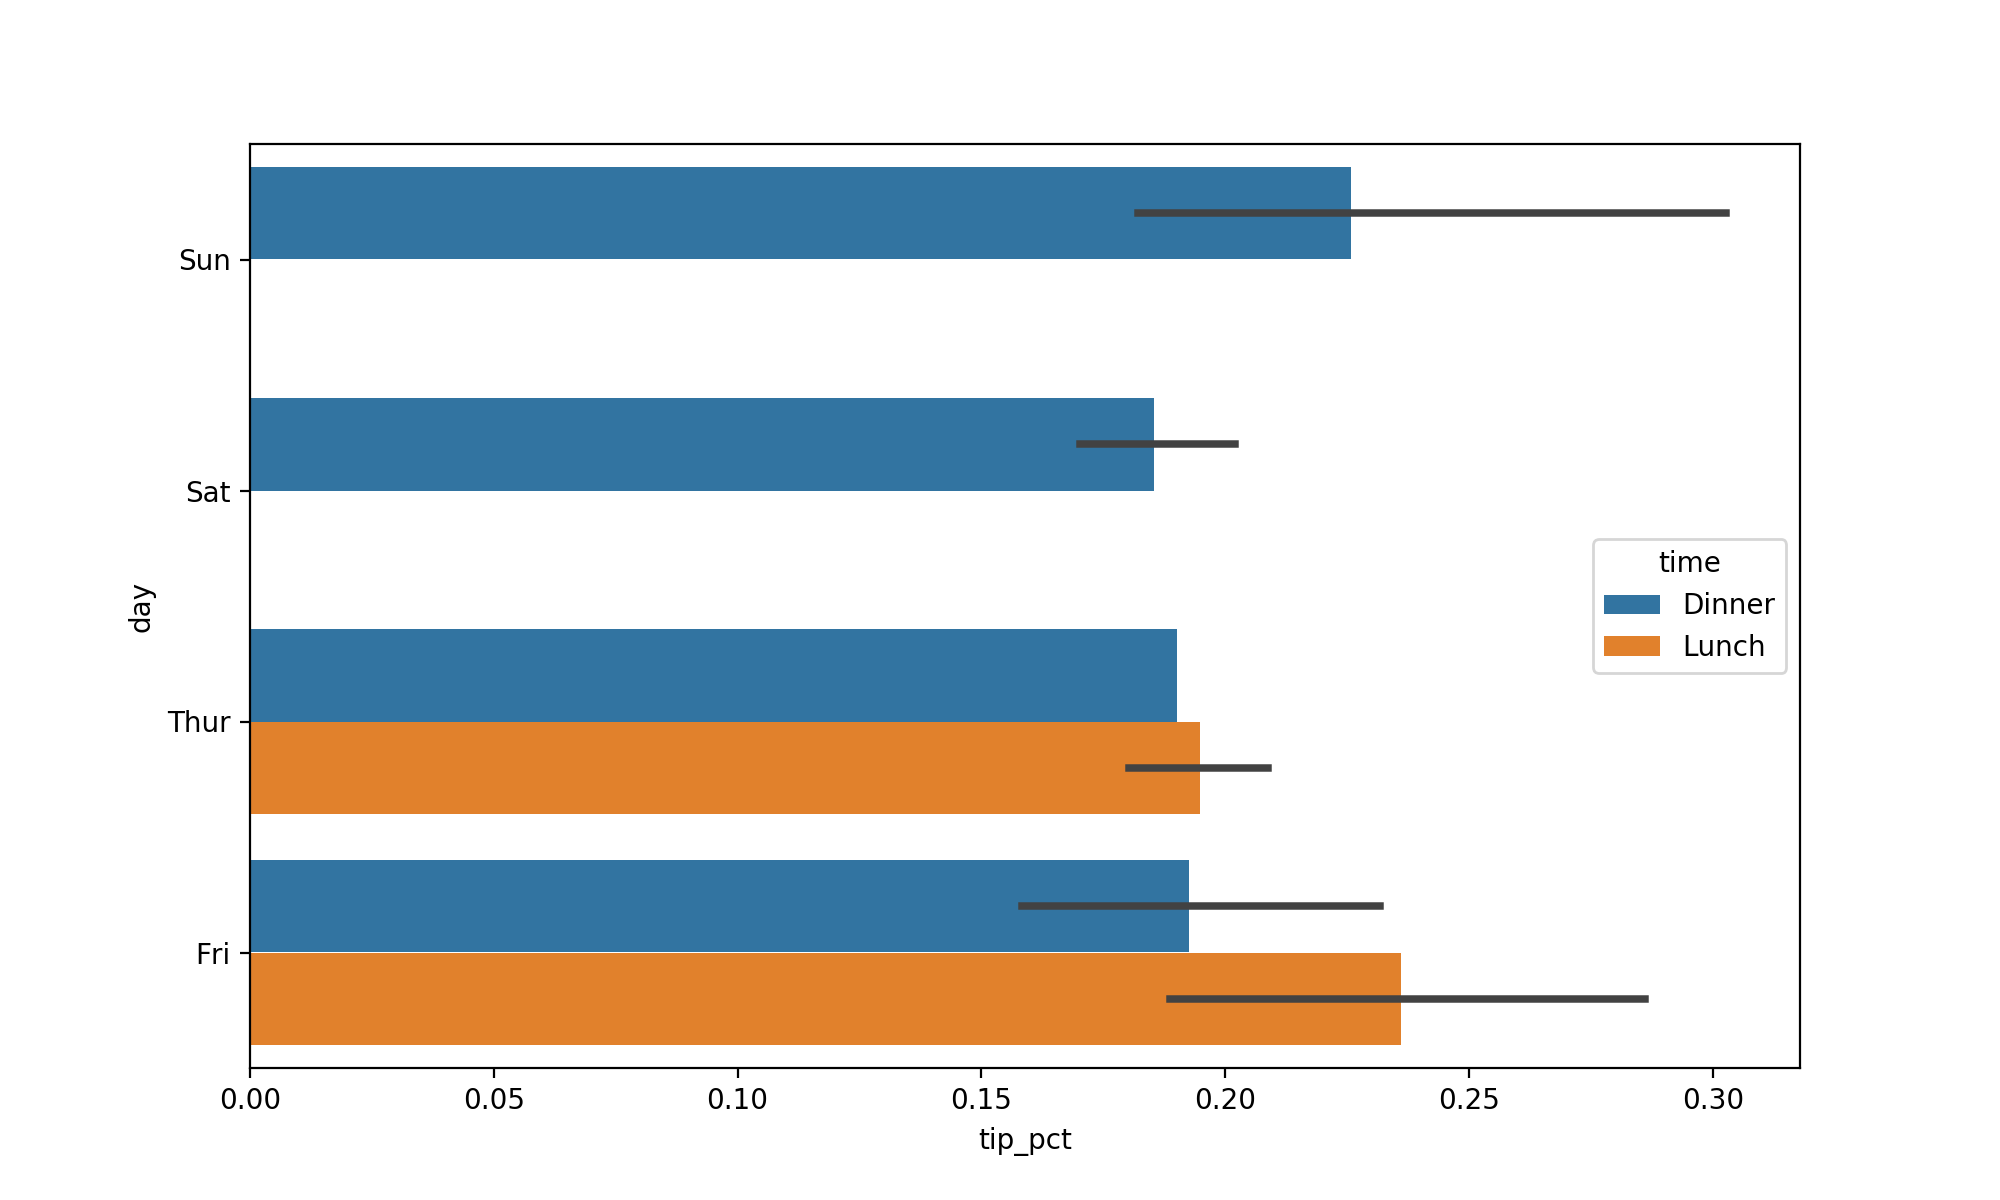

In [72]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [73]:
plt.close('all')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. **You can switch between different plot appearances using `seaborn.set`**:

In [74]:
sns.set(style="whitegrid")

### Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. 

<IPython.core.display.Javascript object>


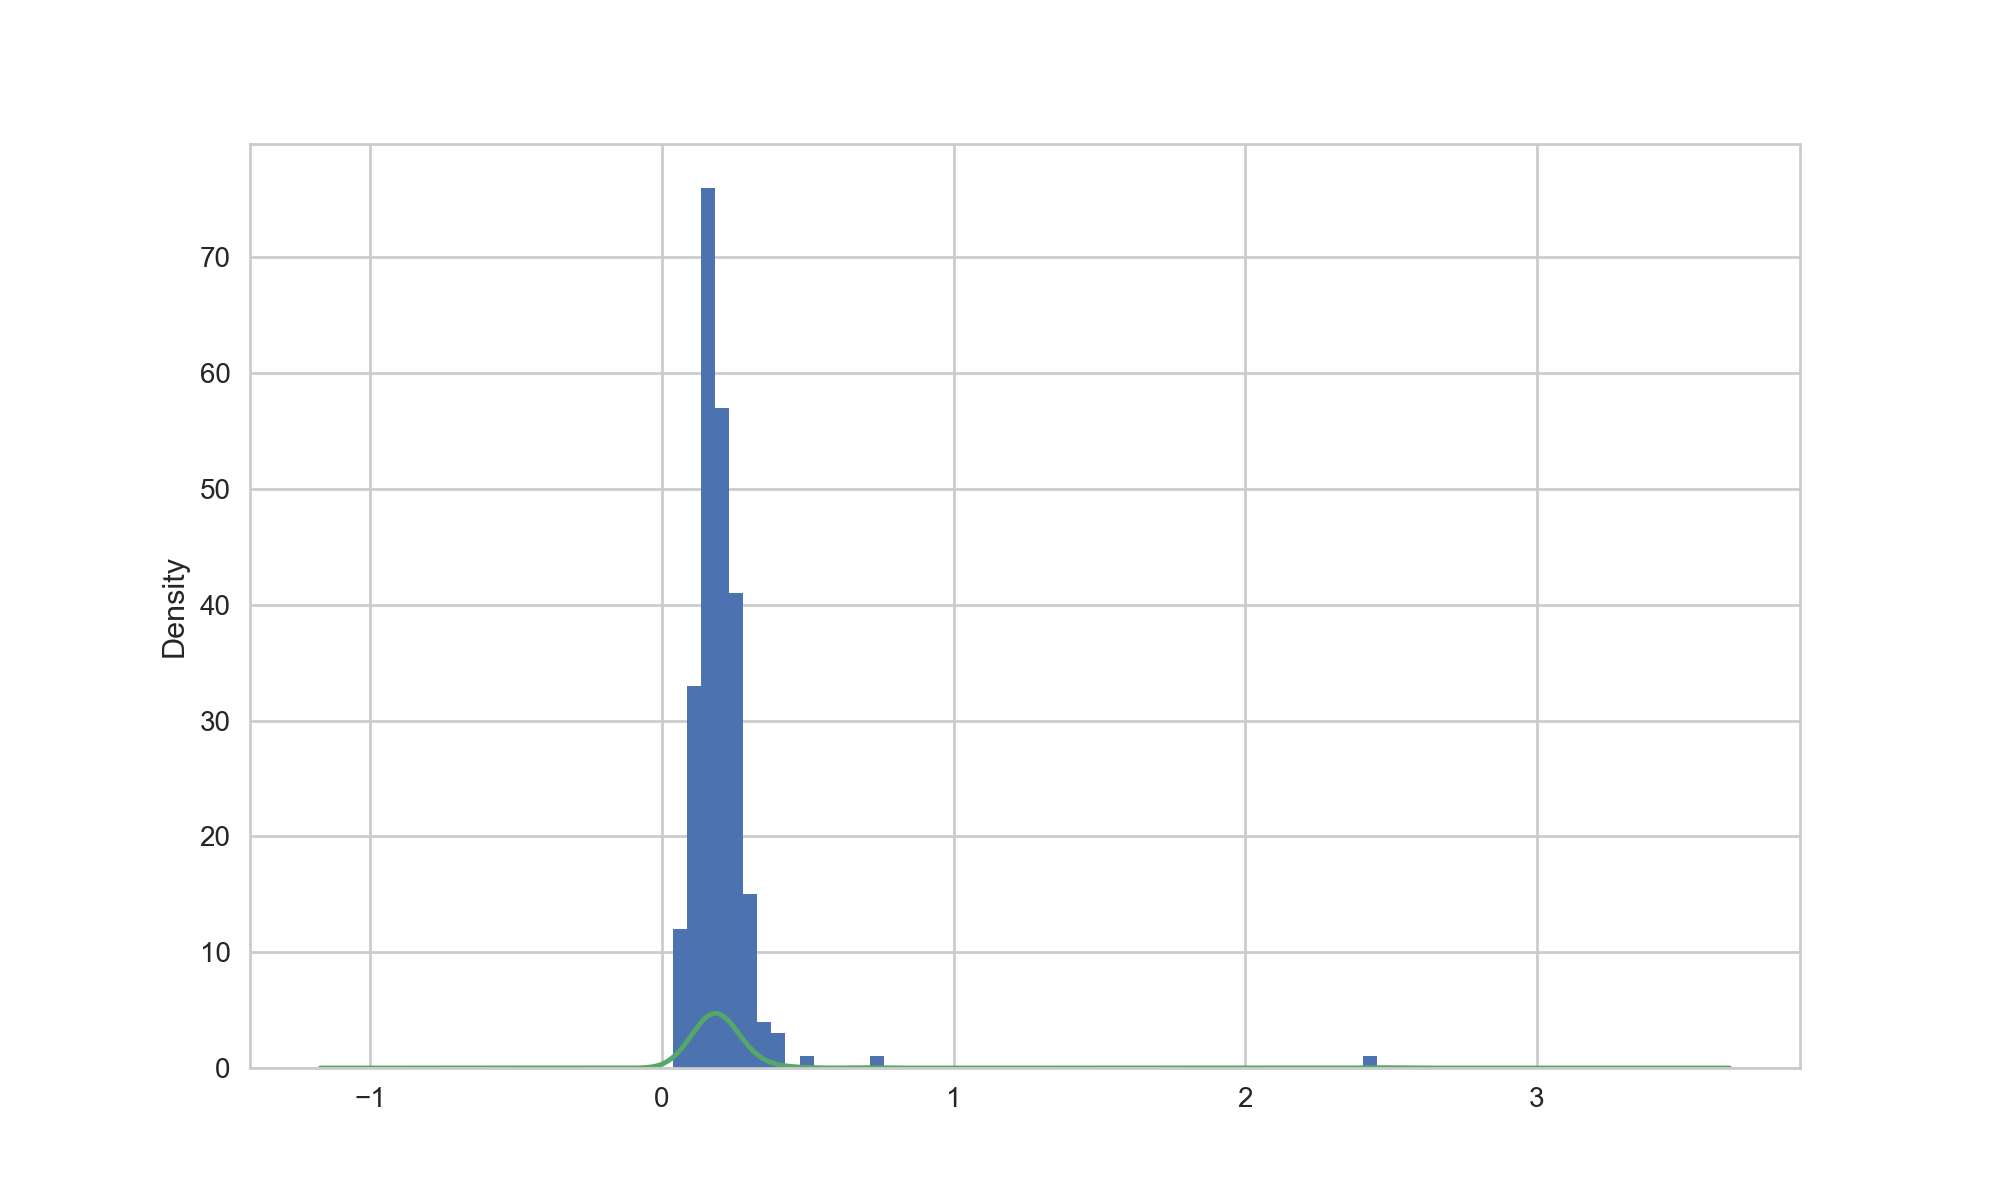

<IPython.core.display.Javascript object>


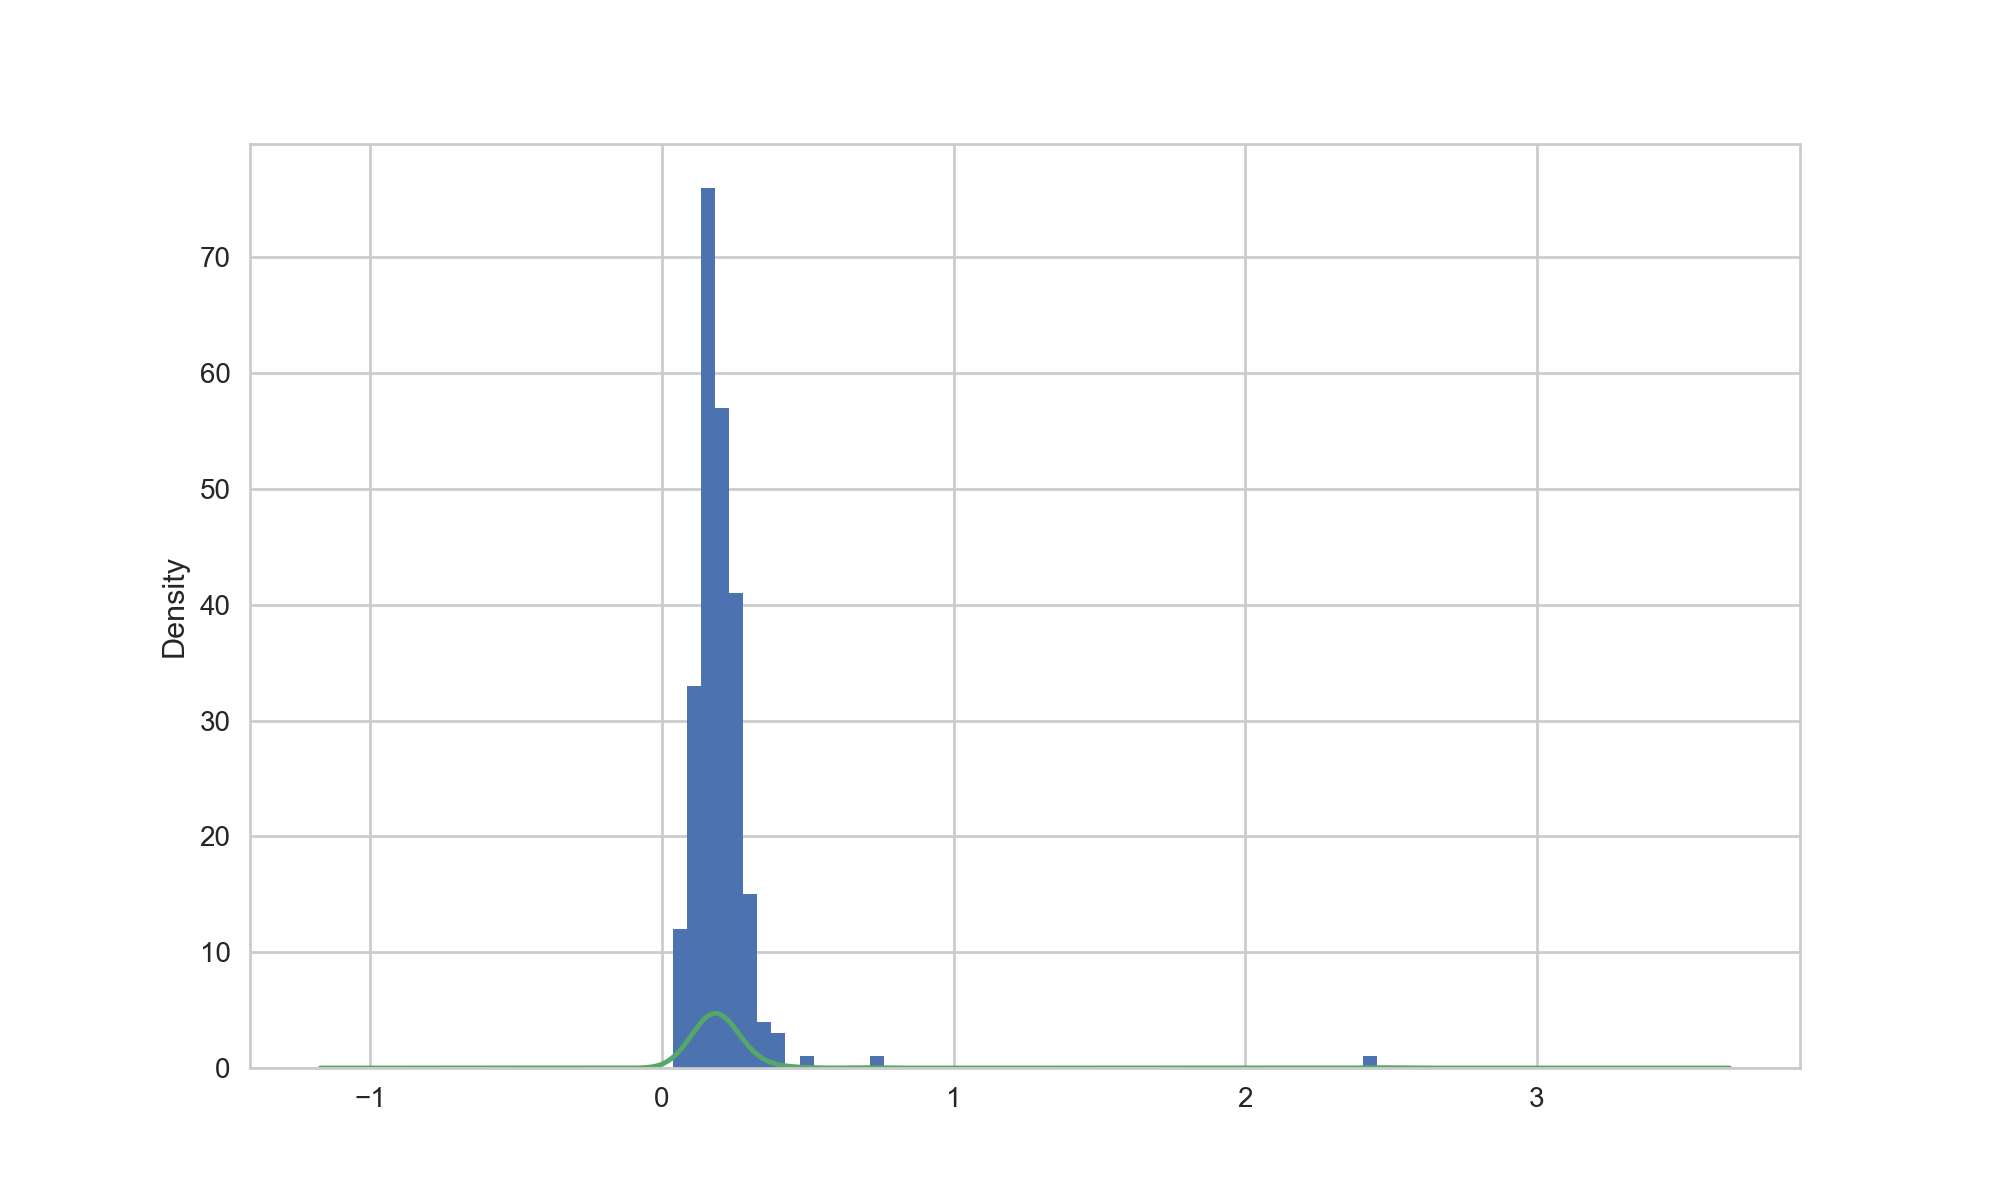

In [75]:
plt.figure()

In [76]:
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


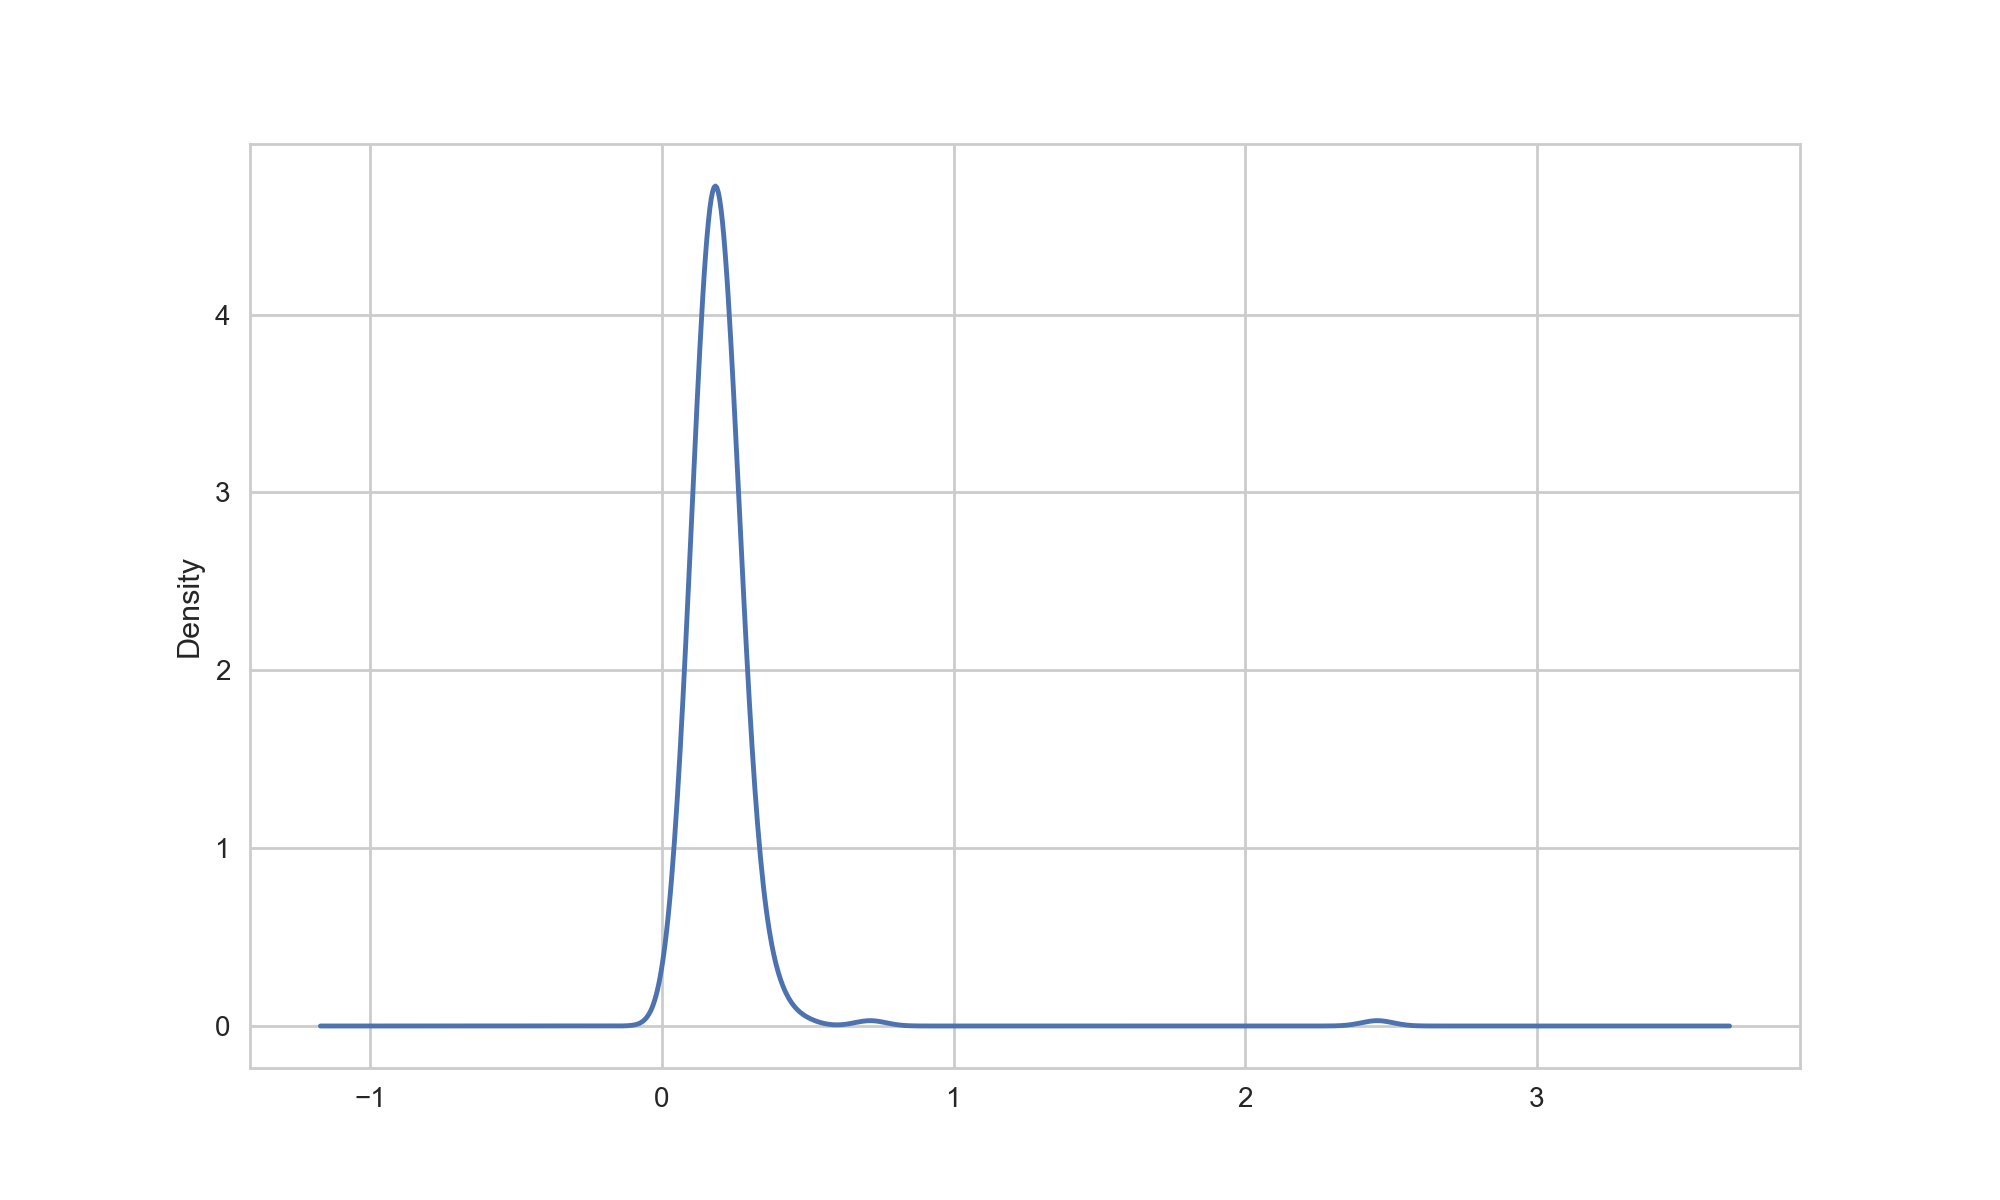

<IPython.core.display.Javascript object>


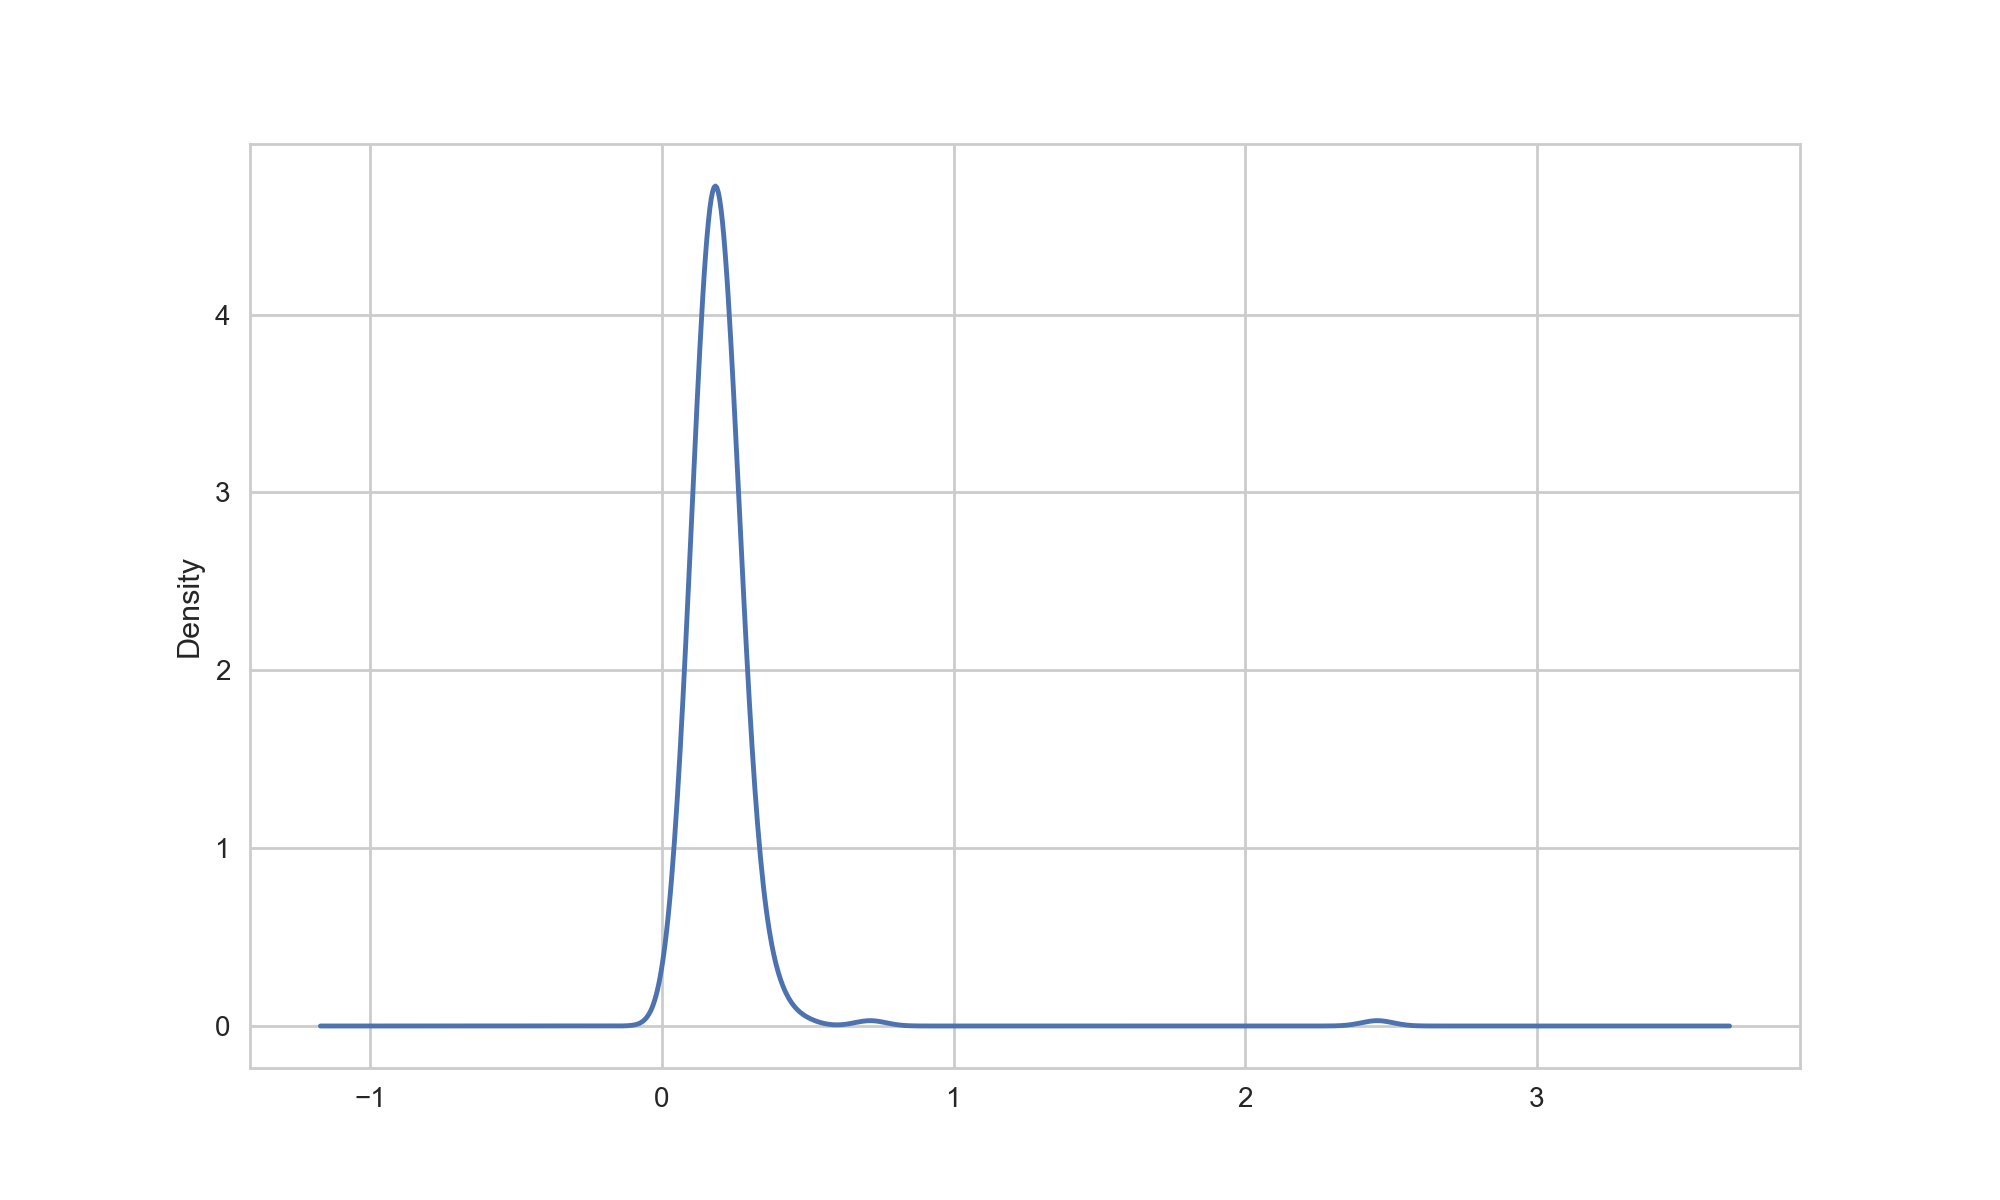

In [78]:
plt.figure()

A related plot type is a density plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of “kernels”—that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots.

In [79]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its **`distplot` method**, which **can plot both a histogram and a continuous density estimate simultaneously**.

<IPython.core.display.Javascript object>


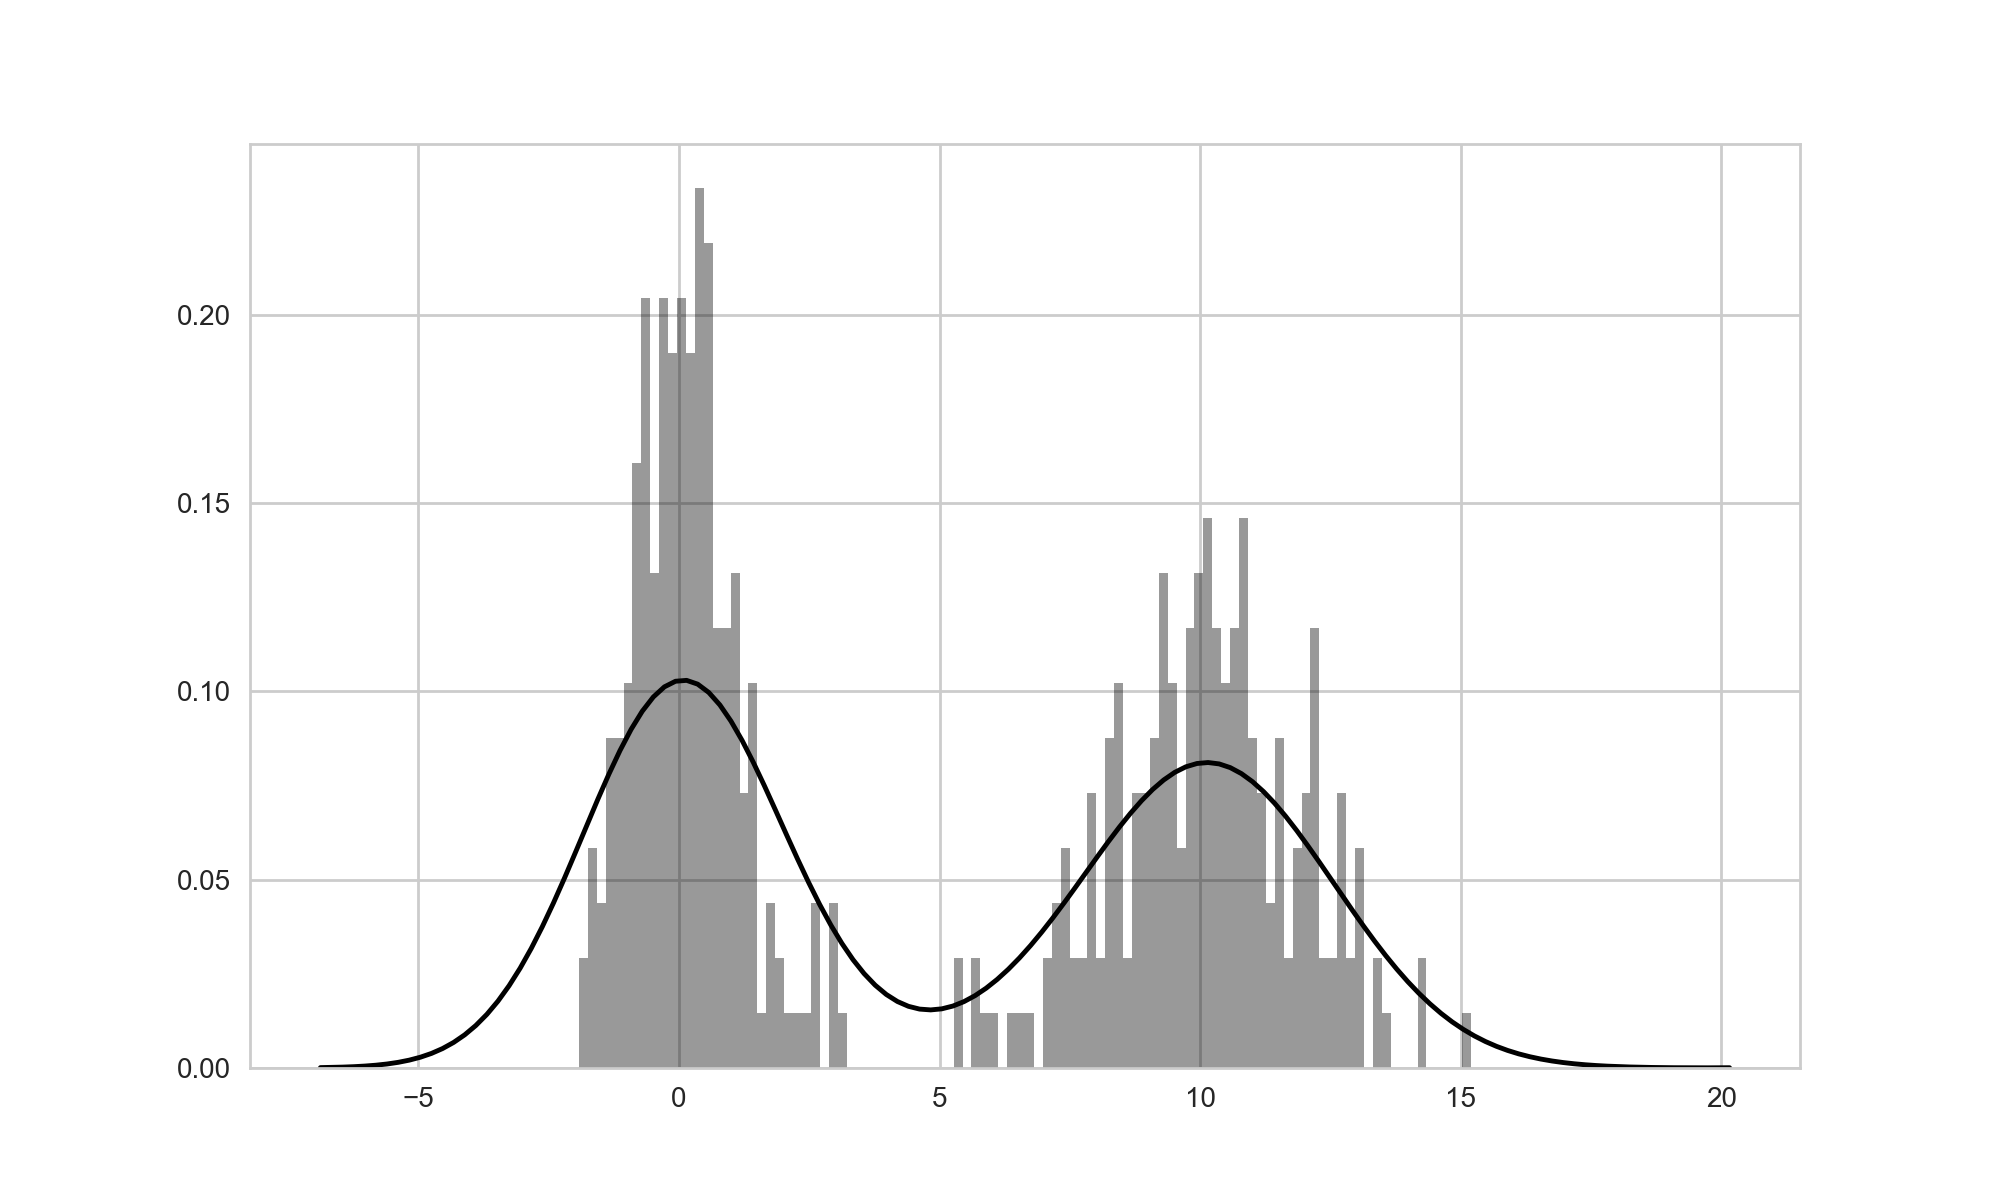

<IPython.core.display.Javascript object>


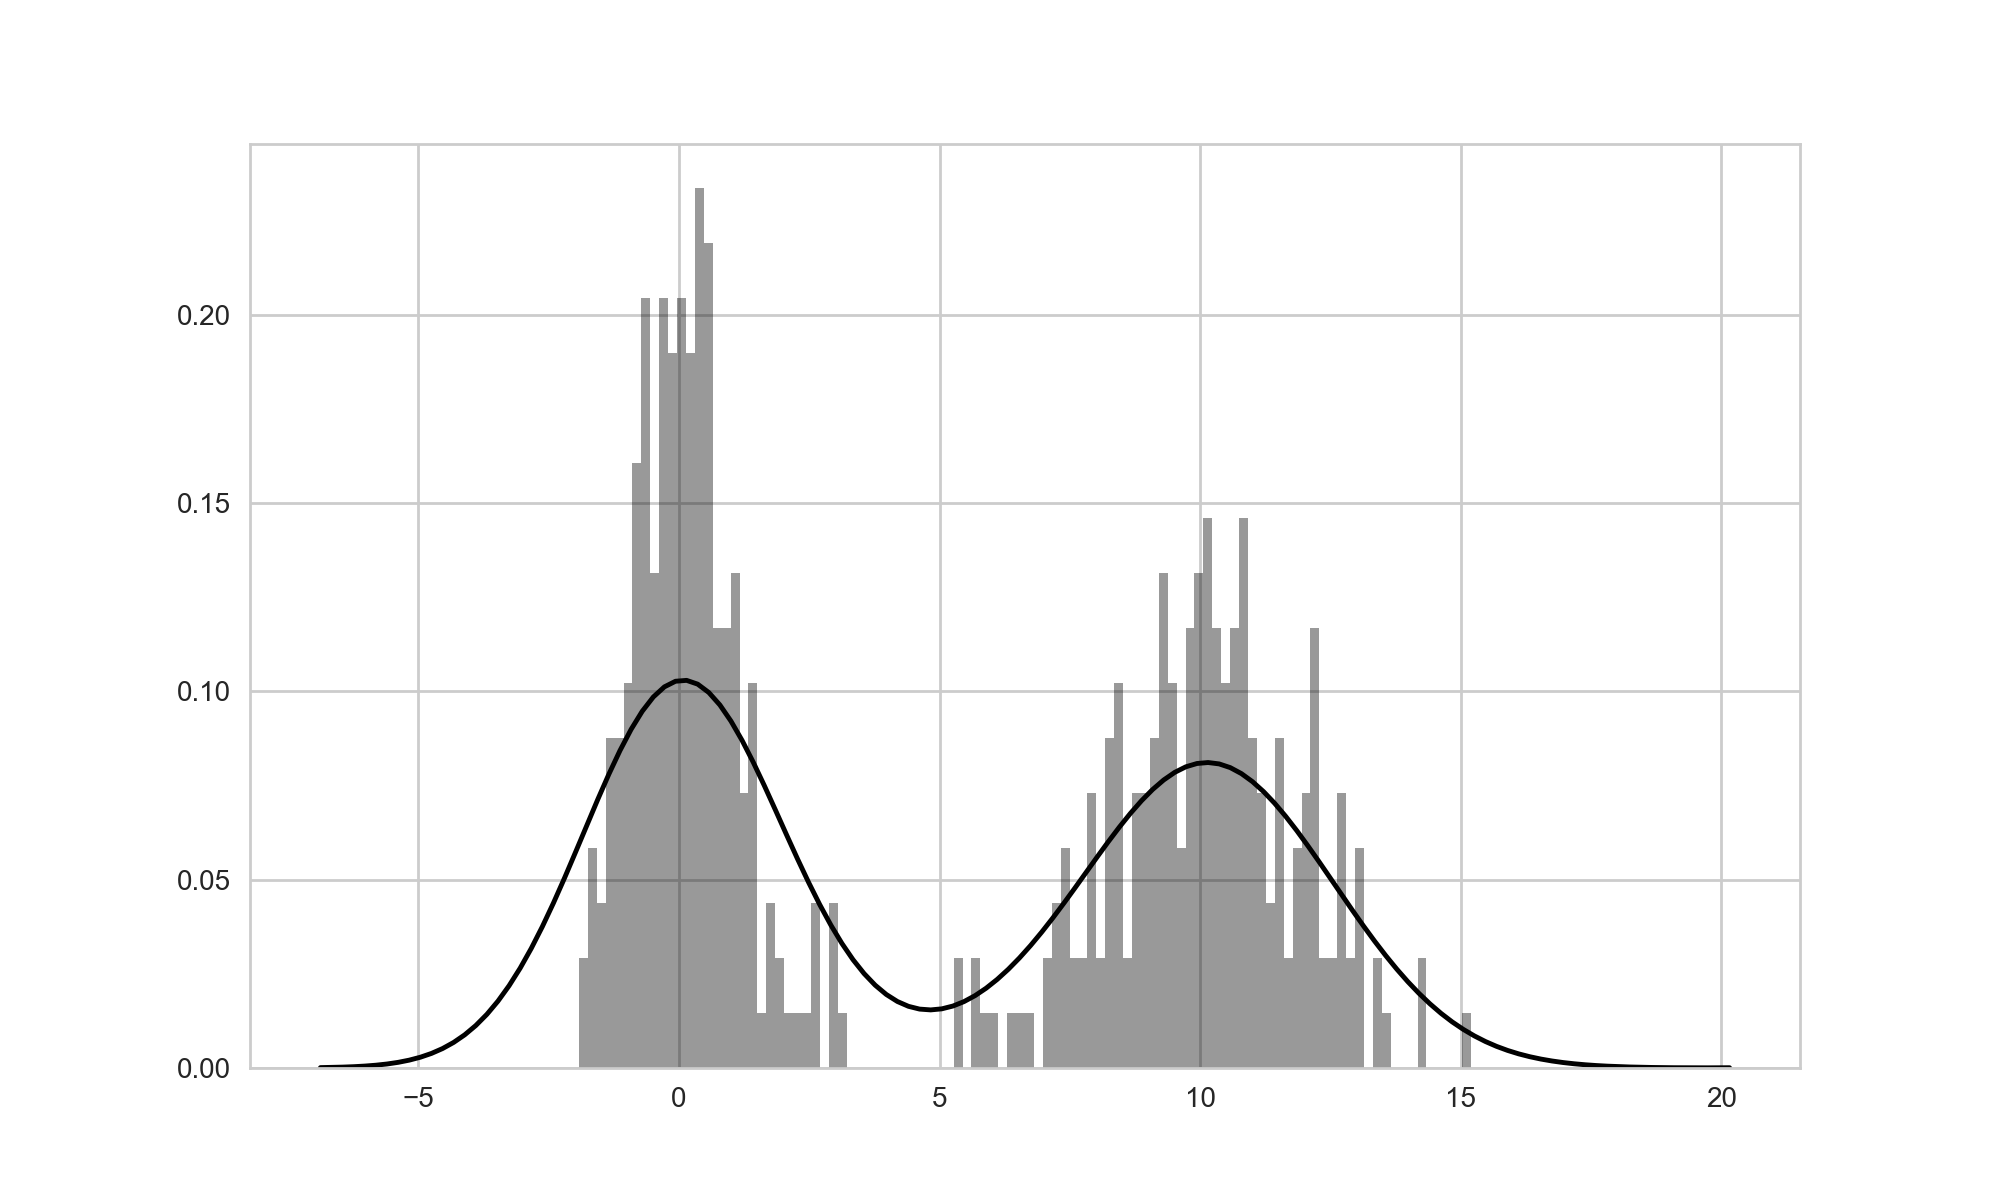

In [80]:
plt.figure()

In [81]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

C:\Users\surface\ananew\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### Scatter or Point Plots

In [82]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

<IPython.core.display.Javascript object>


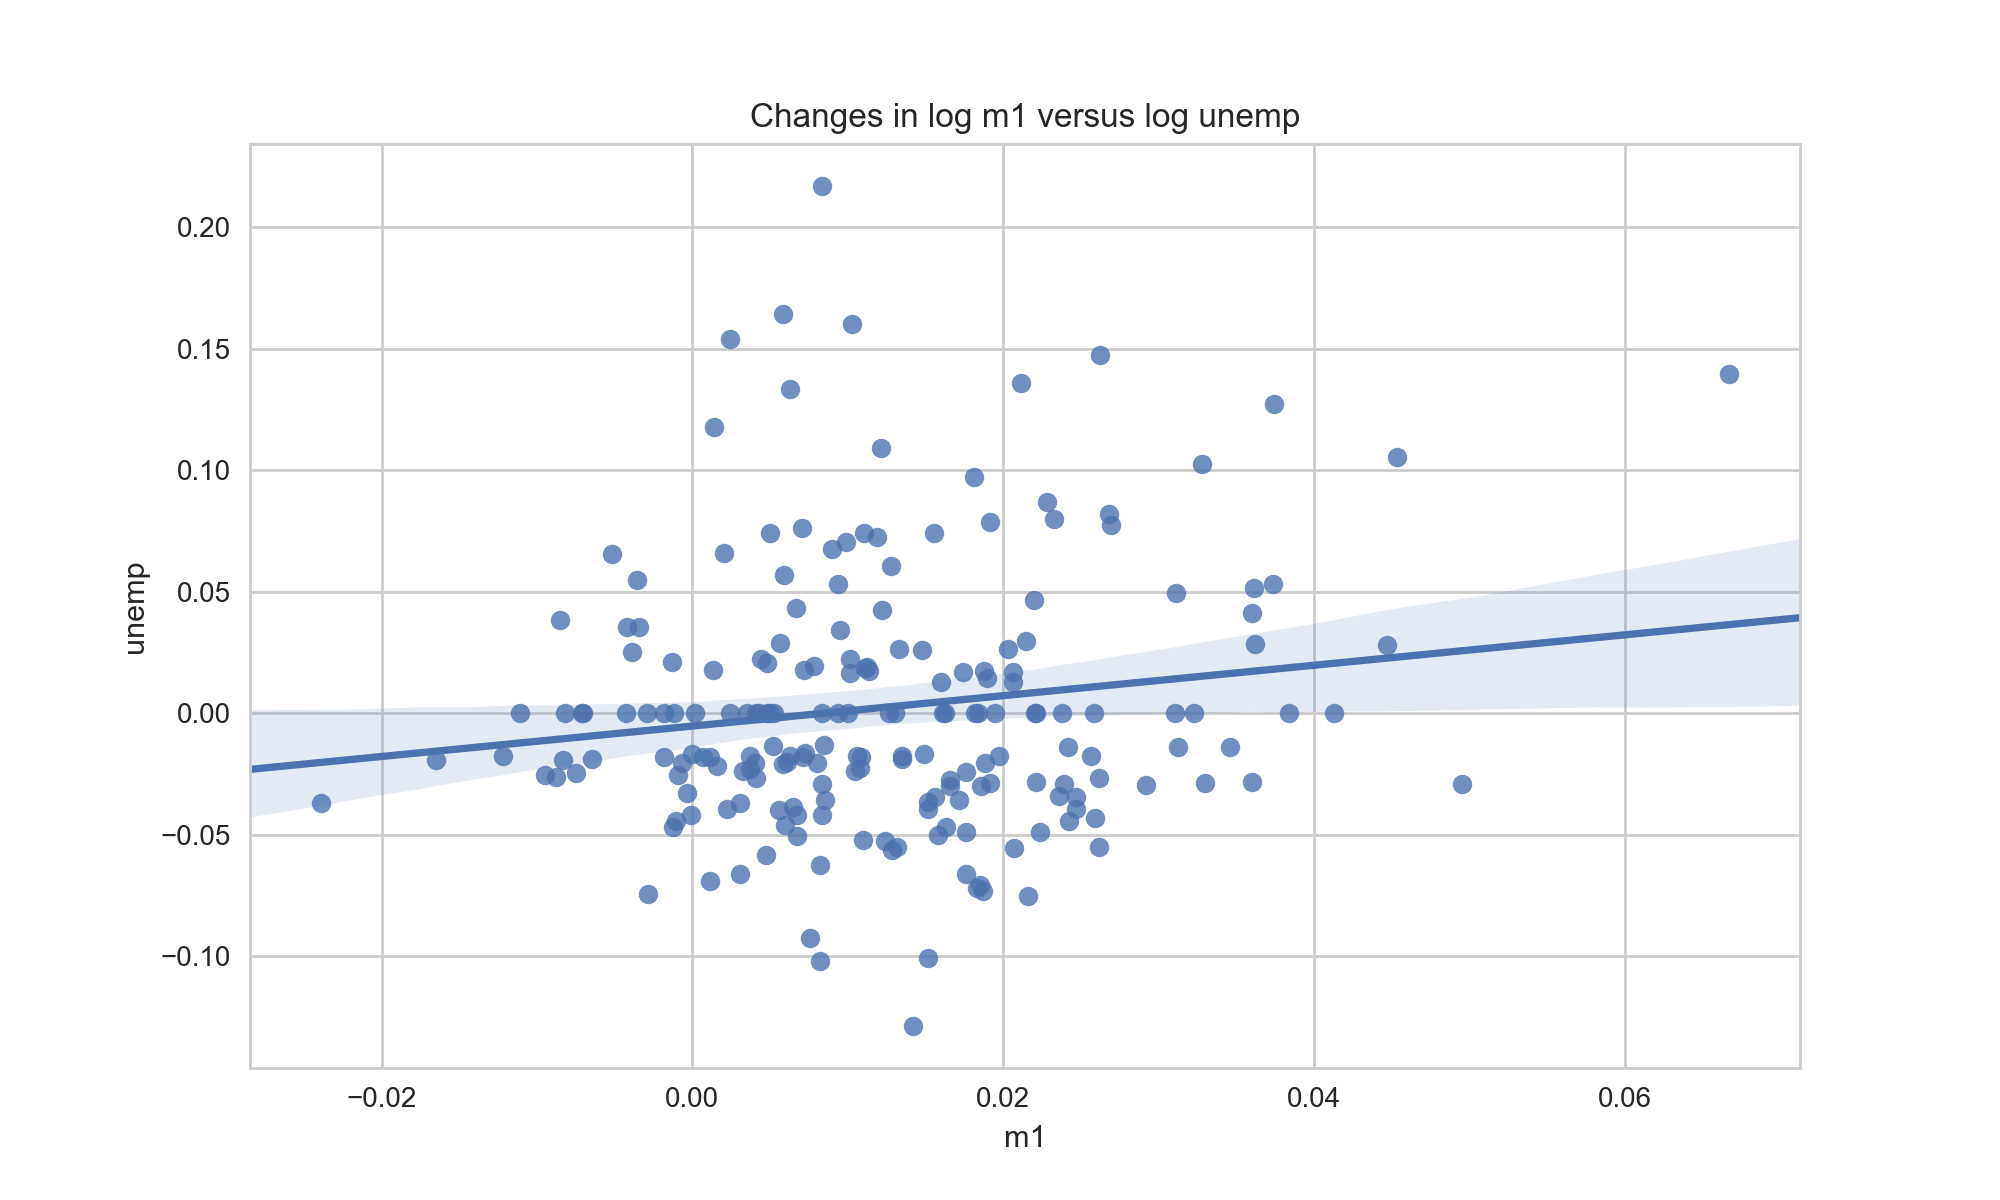

<IPython.core.display.Javascript object>


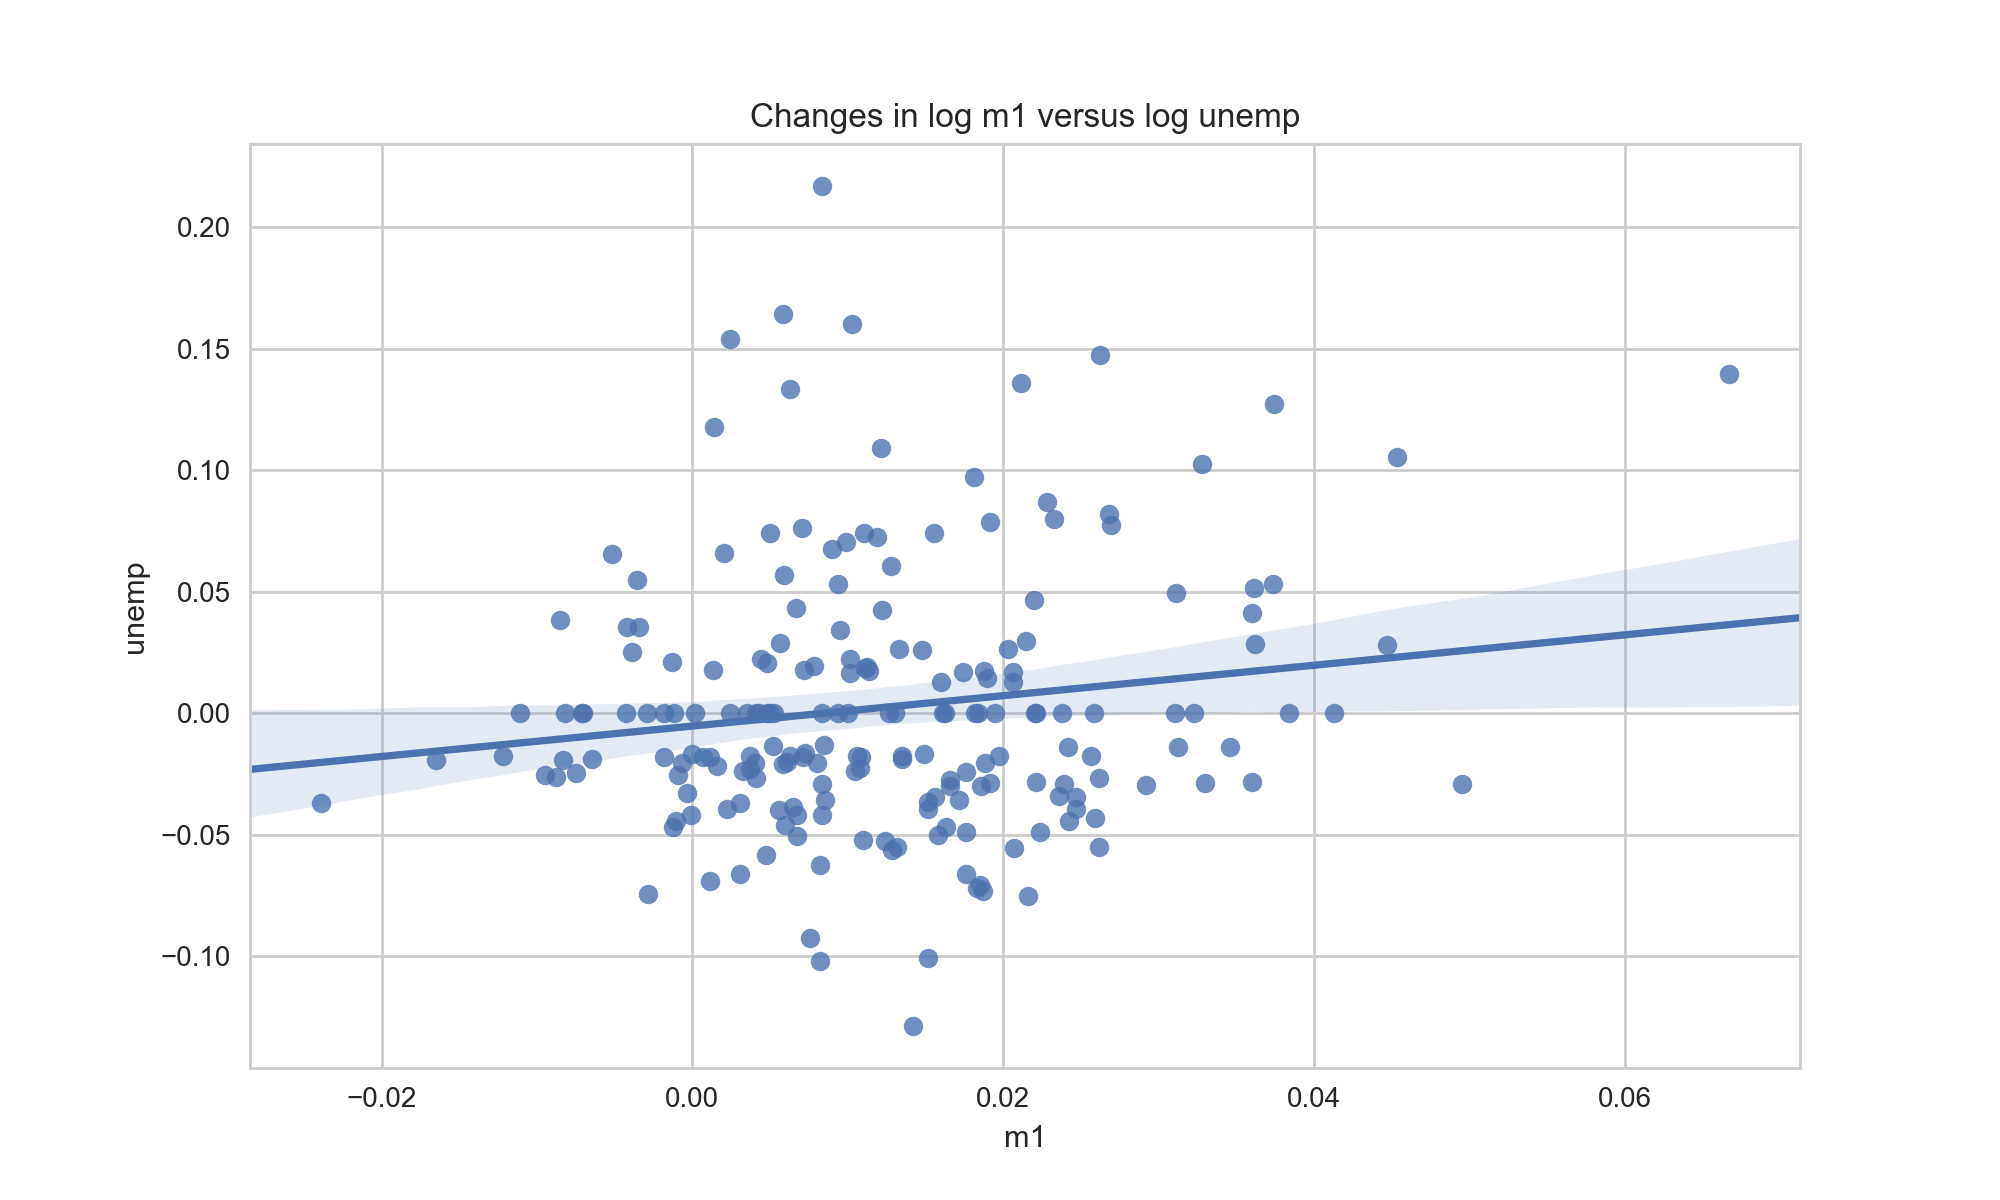

In [83]:
plt.figure()

We can then use seaborn’s `regplot` method, which makes a scatter plot and fits a linear regression line 

In [84]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

C:\Users\surface\ananew\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Changes in log m1 versus log unemp')

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? **One way to visualize data with many categorical variables is to use a _facet grid_**. Seaborn has a useful built-in function `factorplot` that simplifies making many kinds of faceted plots.

<IPython.core.display.Javascript object>


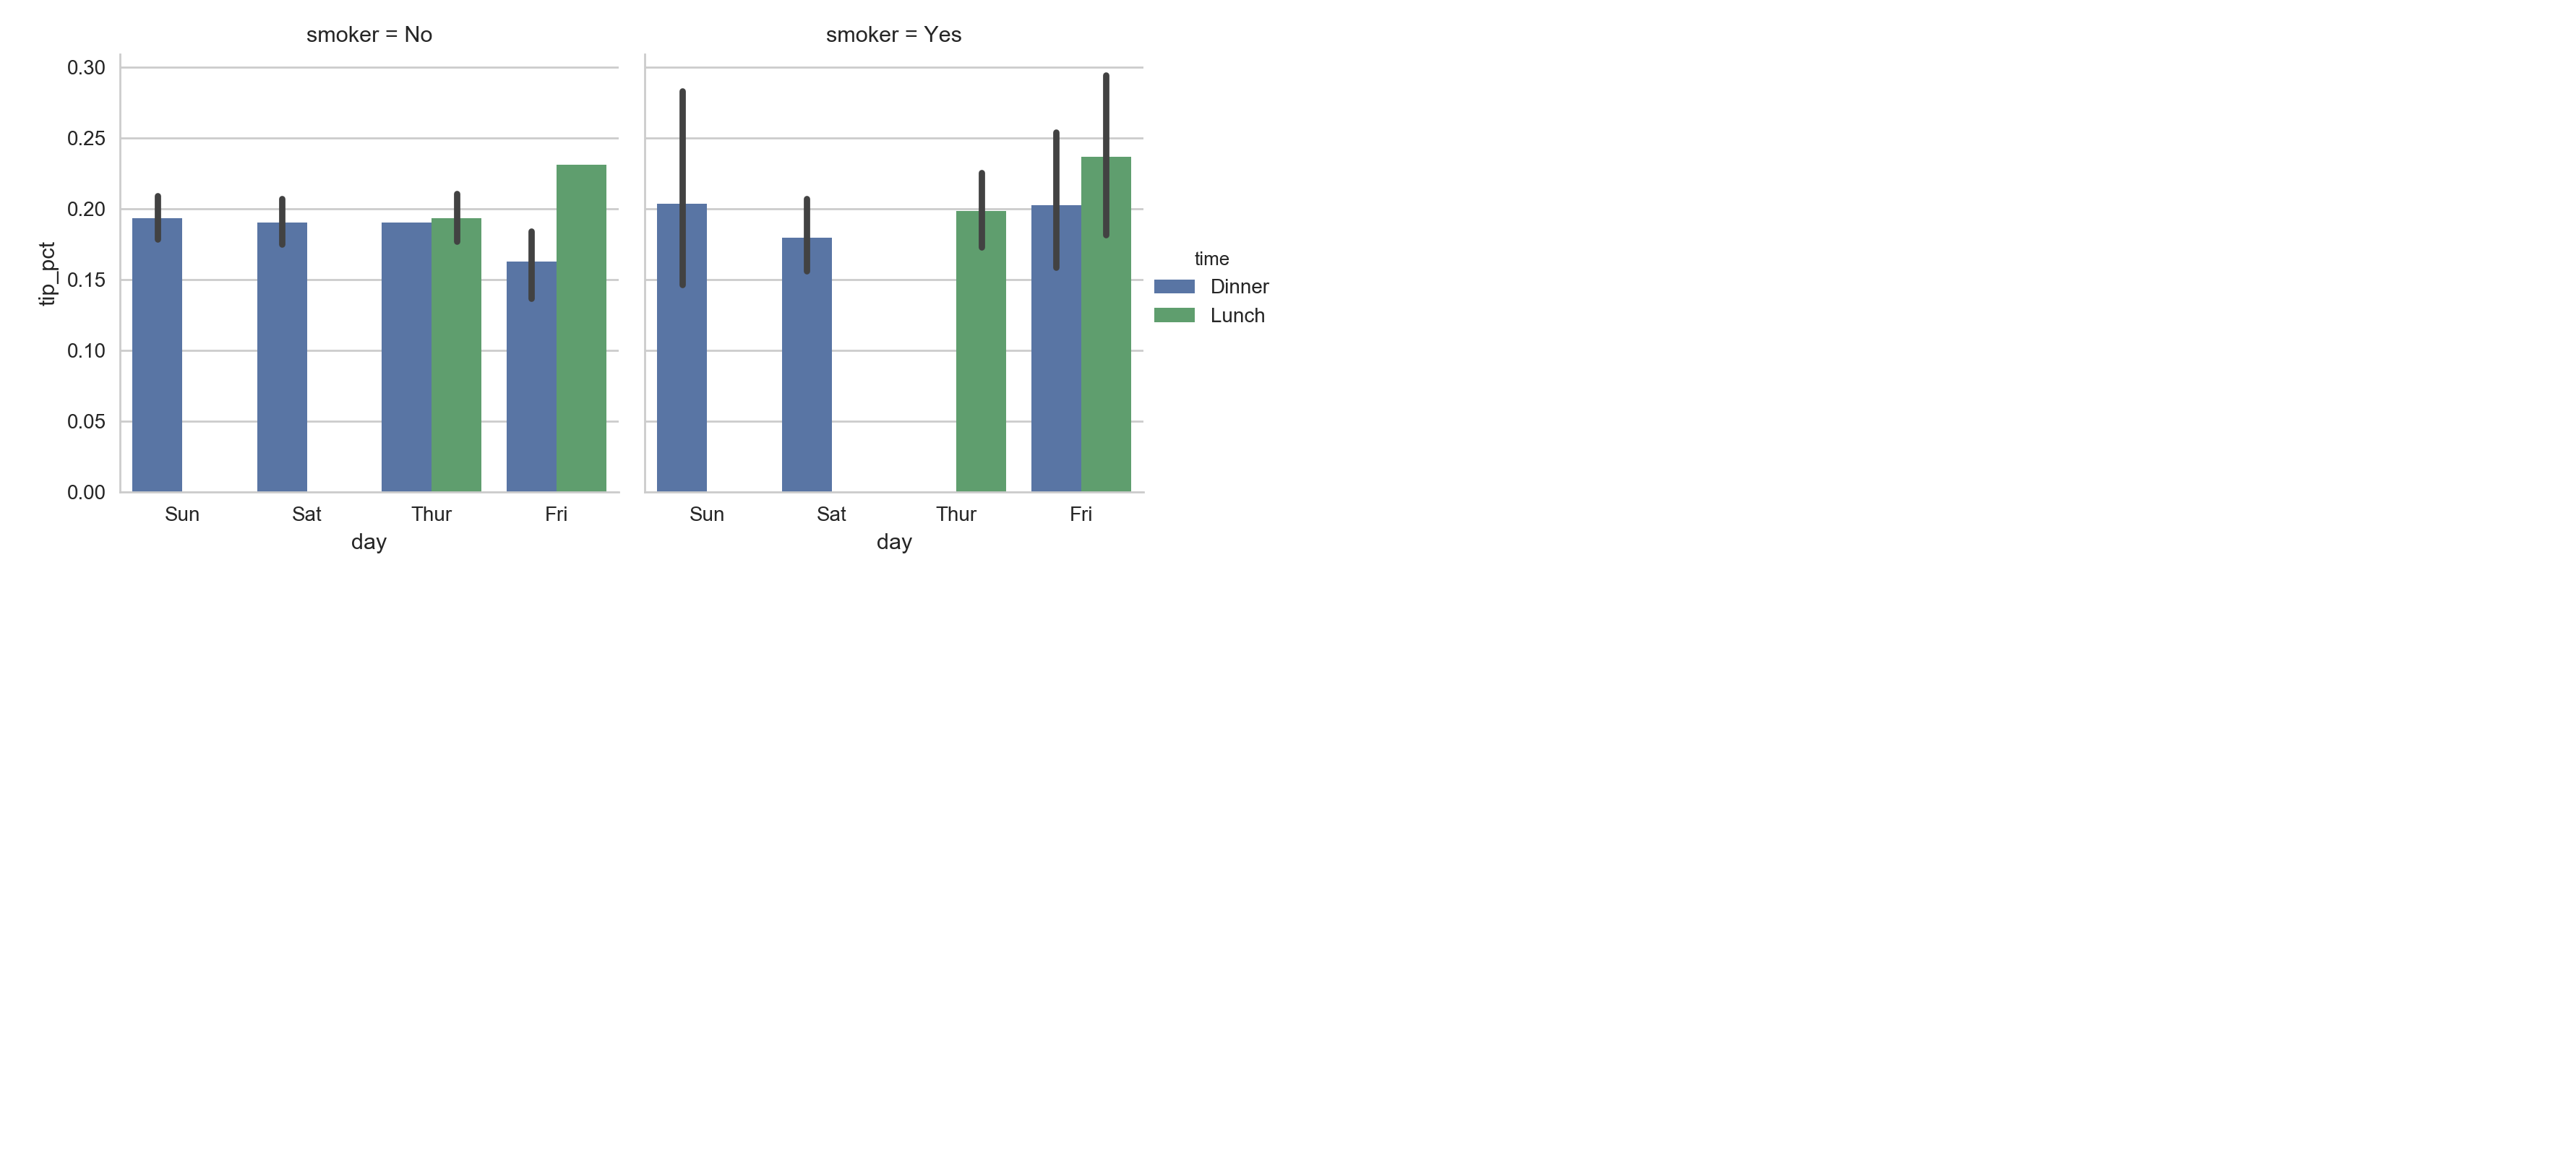

C:\Users\surface\ananew\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [85]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


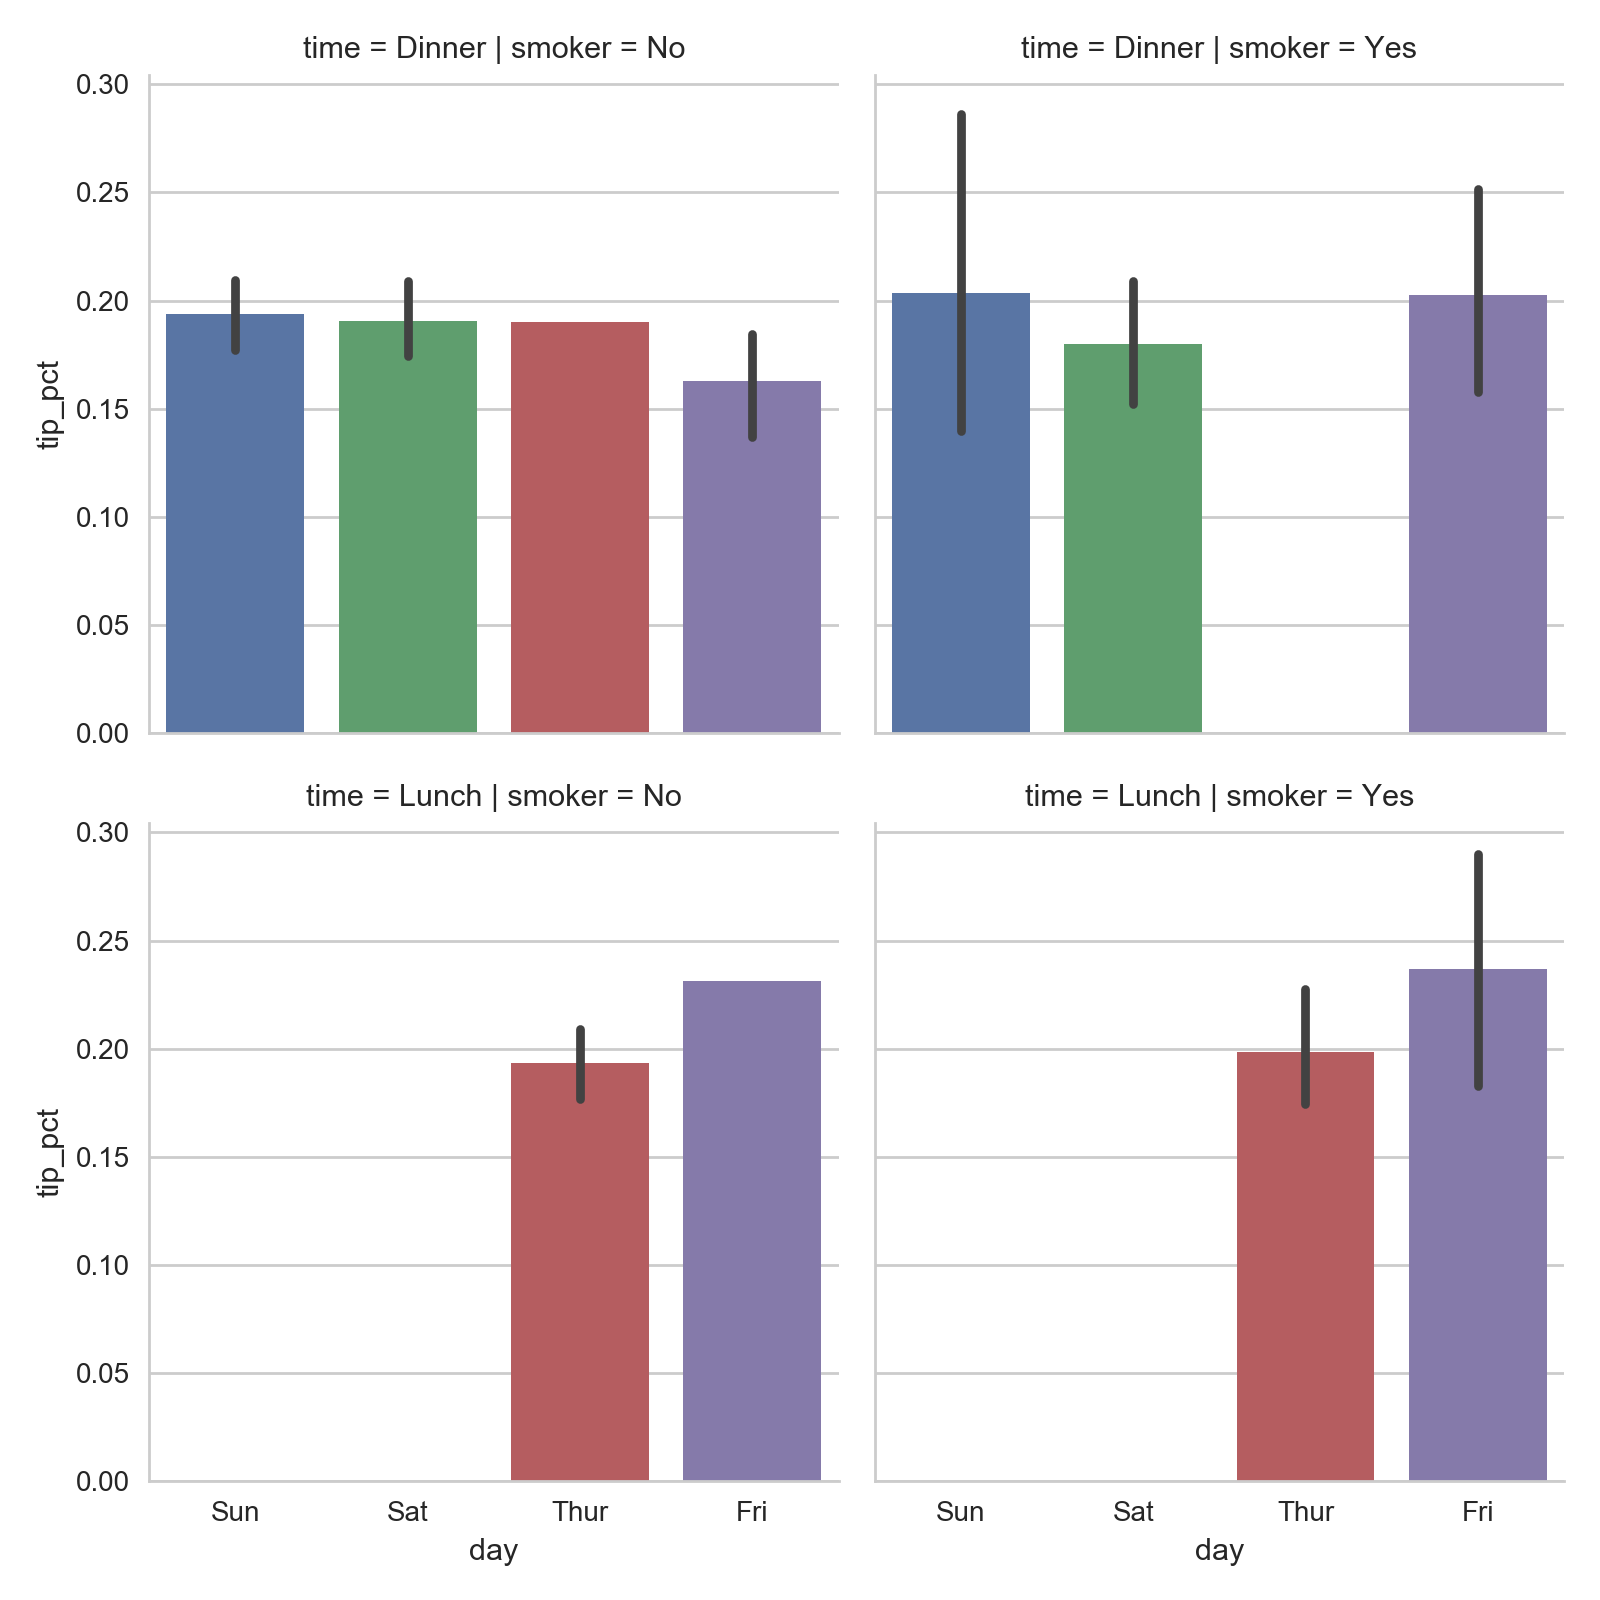

C:\Users\surface\ananew\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [86]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

`factorplot` supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type

<IPython.core.display.Javascript object>


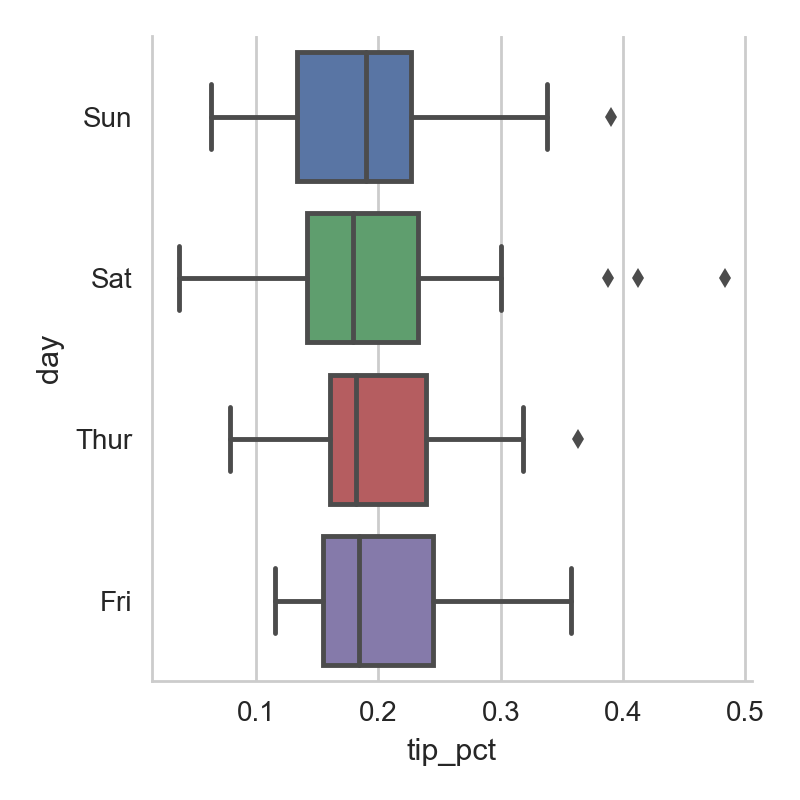

In [87]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion